In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [4]:
plant = "AA"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [5]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AA ['INSTRUÇÕES', 'Clínquer', '95', '110', '133', '145']


<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [7]:
cement_types_per_plant

[('AA', '95', array(['CPIII40'], dtype=object)),
 ('AA', '110', array(['CPINDCC'], dtype=object)),
 ('AA', '133', array(['CPIIIRS32'], dtype=object)),
 ('AA', '145', array(['CPIIIRS40'], dtype=object))]

<IPython.core.display.Javascript object>

In [8]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIII40': 1, 'CPINDCC': 1, 'CPIIIRS32': 1, 'CPIIIRS40': 1})

<IPython.core.display.Javascript object>

In [9]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [10]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [11]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 1743 non-null   object        
 1   (Data, Produção)                             1743 non-null   datetime64[ns]
 2   (Horário, Produção)                          1743 non-null   object        
 3   (Data, Medida)                               784 non-null    datetime64[ns]
 4   (Horário, Medida)                            784 non-null    object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        1743 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  1131 non-null   float64       
 7   (Obs., Unnamed: 8_level_2)                   784 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 109.1+ KB


<IPython.core.display.Javascript object>

In [12]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  271 non-null    float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 95.4 KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                1743 non-null   float64
 1   MgO                1743 non-null   float64
 2   Na2O               1743 non-null   float64
 3   Al2O3              1743 non-null   float64
 4   SiO2               1743 non-null   float64
 5   SO3                1743 non-null   float64
 6   K2O                1743 non-null   float64
 7   TiO2               1743 non-null   float64
 8   Fe2O3              1743 non-null   float64
 9   Perda ao fogo      1743 non-null   object 
 10  Resíduo insolúvel  1736 non-null   object 
 11  Obs.               0 non-null      float64
dtypes: float64(10), object(2)
memory usage: 163.5+ KB


<IPython.core.display.Javascript object>

In [15]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          856 non-null    object 
 1   C2S total          612 non-null    object 
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               1667 non-null   object 
 6   C3A                1640 non-null   object 
 7   C3A cubic          1667 non-null   object 
 8   C3A orto           1667 non-null   object 
 9   CaO livre          1667 non-null   object 
 10  Portlandita        1667 non-null   object 
 11  Periclasio         1667 non-null   object 
 12  Arcanita           1667 non-null   object 
 13  Aphthalita         1667 non-null   object 
 14  Langbeinita        883 non-null    object 
 15  Sulfato de cálcio  612 non-null    object 
 16  Bassanita          1667 

<IPython.core.display.Javascript object>

In [16]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [17]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            1743 non-null   int64  
 1   (Unnamed: 137_level_1, #200)              1743 non-null   float64
 2   (Unnamed: 138_level_1, #325)              612 non-null    float64
 3   (Unnamed: 139_level_1, #400)              1743 non-null   float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 81.8 KB


<IPython.core.display.Javascript object>

In [18]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1743 non-null   int64  
 1   (Tempo de pega, Fim)              1743 non-null   int64  
 2   (Resistência à compressão, 1 d)   0 non-null      float64
 3   (Resistência à compressão, 3 d)   1743 non-null   float64
 4   (Resistência à compressão, 7 d)   1743 non-null   object 
 5   (Resistência à compressão, 28 d)  1743 non-null   object 
 6   (Obs., Unnamed: 148_level_2)      2 non-null      object 
dtypes: float64(2), int64(2), object(3)
memory usage: 95.4+ KB


<IPython.core.display.Javascript object>

In [19]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [20]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Composição"].rename(
            {"Sulfato de cálcio": "Sulfato de cálcio (composição)"}, axis=1
        ),
        df["Cimento"]["Análise mineralógica"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  1743 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  1743 non-null   object 
 2   (Data, Produção)                                              1743 non-null   object 
 3   (Horário, Produção)                                           1743 non-null   object 
 4   (Data, Medida)                                                784 non-null    object 
 5   (Horário, Medida)                                             784 non-null    object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         1743 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   1131 no

<IPython.core.display.Javascript object>

In [22]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
    "Clínquer": "Clinker",
    "Fíler calcário": "Calcareous filler",
    "Cinza volante": "Fly ash",
    "Escória": "Slag",
    "Argila calcinada": "Calcined clay",
    "Sulfato de cálcio": "Calcium sulfate",
    "C3S total": "Total C3S",
    "C2S total": "Total C2S",
    "C2S alpha": "Alpha C2S",
    "C2S beta": "Beta C2S",
    "C2S gama": "Gamma C2S",
    "C4AF": "C4AF",
    "C3A": "C3A",
    "C3A cubic": "Cubic C3A",
    "C3A orto": "Orthorhombic C3A",
    "CaO livre": "Free CaO",
    "Portlandita": "Portlandite",
    "Periclasio": "Periclase",
    "Arcanita": "Arcanite",
    "Aphthalita": "Aphthitalite",
    "Langbeinita": "Langbeinite",
    "Bassanita": "Bassanite",
    "Anidrita": "Anhydrite",
    "Calcita": "Calcite",
    "Dolomita": "Dolomite",
    "Quartzo": "Quartz",
    "Muscovita": "Muscovite",
    "Sulfato de cálcio (composição)": "Calcium sulfate (composition)",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [23]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [24]:
NUMERIC_COLUMNS = [
    "Calcium sulfate (composition)",
    "Clinker",
    "Calcareous filler",
    "Fly ash",
    "Slag",
    "Calcined clay",
    "Calcium sulfate",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimita",
    "Quartz",
    "Muscovite",
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string 

<IPython.core.display.Javascript object>

# EDA

In [25]:
df.shape

(1742, 54)

<IPython.core.display.Javascript object>

In [26]:
df.head()

Plant        City       Date  Clinker  Calcareous filler  Fly ash  Slag  \
0    AA  Santa Cruz 2021-01-06      NaN                NaN      NaN   NaN   
1    AA  Santa Cruz 2021-01-08      NaN                NaN      NaN   NaN   
2    AA  Santa Cruz 2021-01-11      NaN                NaN      NaN   NaN   
3    AA  Santa Cruz 2021-01-13      NaN                NaN      NaN   NaN   
4    AA  Santa Cruz 2021-01-15      NaN                NaN      NaN   NaN   

   Calcined clay  Calcium sulfate (composition)  Total C3S  ...  #325  #400  \
0            NaN                           2.44        NaN  ...   NaN   1.5   
1            NaN                           2.30        NaN  ...   NaN   1.6   
2            NaN                           1.62        NaN  ...   NaN   1.9   
3            NaN                           2.28        NaN  ...   NaN   1.9   
4            NaN                           2.49        NaN  ...   NaN   1.8   

   Specific Gravity  Initial setting time  Final setting time  CS1   CS3  \
0               NaN                 215.0               280.0  NaN  22.2   
1               NaN                 185.0               235.0  NaN  20.9   
2               NaN                 190.0               260.0  NaN  22.5   
3               NaN                 215.0               270.0  NaN  22.3   
4               NaN                 190.0               255.0  NaN  22.4   

    CS7  CS28  Cement_Type  
0  34.6  46.3     CP III40  
1  28.1  43.9     CP III40  
2  34.5  51.0     CP III40  
3  34.3  46.1     CP III40  
4  34.8  48.3     CP III40  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [27]:
df.tail()

Plant        City       Date  Clinker  Calcareous filler  Fly ash  Slag  \
1737    AA  Santa Cruz 2023-08-02      NaN                NaN      NaN   NaN   
1738    AA  Santa Cruz 2023-08-04      NaN                NaN      NaN   NaN   
1739    AA  Santa Cruz 2023-08-07      NaN                NaN      NaN   NaN   
1740    AA  Santa Cruz 2023-08-09      NaN                NaN      NaN   NaN   
1741    AA  Santa Cruz 2023-08-11      NaN                NaN      NaN   NaN   

      Calcined clay  Calcium sulfate (composition)  Total C3S  ...  #325  \
1737            NaN                            NaN        NaN  ...   NaN   
1738            NaN                            NaN        NaN  ...   NaN   
1739            NaN                            NaN        NaN  ...   NaN   
1740            NaN                            NaN        NaN  ...   NaN   
1741            NaN                            NaN        NaN  ...   NaN   

      #400  Specific Gravity  Initial setting time  Final setting time  CS1  \
1737  1.61               NaN                 240.0               310.0  NaN   
1738  1.71               NaN                 240.0               300.0  NaN   
1739  1.71               NaN                 250.0               320.0  NaN   
1740  1.39               NaN                 240.0               345.0  NaN   
1741  1.61               NaN                 240.0               325.0  NaN   

            CS3        CS7  CS28              Cement_Type  
1737  26.200001  39.900002   NaN  CP III-RS40Expedido D-G  
1738  24.000000  33.799999   NaN  CP III-RS40Expedido D-G  
1739  25.000000  37.400002   NaN  CP III-RS40Expedido D-G  
1740  25.100000        NaN   NaN  CP III-RS40Expedido D-G  
1741  24.400000        NaN   NaN  CP III-RS40Expedido D-G  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Plant                          1742 non-null   object        
 1   City                           1742 non-null   object        
 2   Date                           1742 non-null   datetime64[ns]
 3   Clinker                        0 non-null      float64       
 4   Calcareous filler              0 non-null      float64       
 5   Fly ash                        0 non-null      float64       
 6   Slag                           0 non-null      float64       
 7   Calcined clay                  0 non-null      float64       
 8   Calcium sulfate (composition)  270 non-null    float64       
 9   Total C3S                      852 non-null    float64       
 10  Total C2S                      608 non-null    float64       
 11  Alpha C2S        

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [29]:
df.dtypes.value_counts()

float64           50
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [30]:
df.describe().transpose()

count                           mean  \
Date                             1742  2022-03-29 12:23:08.748564992   
Clinker                           0.0                            NaN   
Calcareous filler                 0.0                            NaN   
Fly ash                           0.0                            NaN   
Slag                              0.0                            NaN   
Calcined clay                     0.0                            NaN   
Calcium sulfate (composition)   270.0                       2.693074   
Total C3S                       852.0                      49.172969   
Total C2S                       608.0                      13.012533   
Alpha C2S                         0.0                            NaN   
Beta C2S                          0.0                            NaN   
Gamma C2S                         0.0                            NaN   
C4AF                           1421.0                       6.457347   
C3A                            1096.0                       2.572062   
Cubic C3A                      1421.0                       1.933617   
Orthorhombic C3A               1421.0                       0.348761   
Free CaO                       1421.0                       0.199965   
Portlandite                    1421.0                       1.030429   
Periclase                      1421.0                       0.379937   
Arcanite                       1421.0                       0.072583   
Aphthitalite                   1149.0                       0.196789   
Langbeinite                     878.0                       0.038508   
Calcium sulfate                 608.0                       5.932122   
Bassanite                      1421.0                       1.170936   
Anhydrite                         0.0                            NaN   
Calcite                        1421.0                       3.451766   
Dolimita                       1422.0                       0.007103   
Quartz                         1421.0                       0.632343   
Muscovite                      1421.0                       0.227551   
CaO                            1742.0                      54.316308   
MgO                            1742.0                        3.63608   
Na2O                           1742.0                       0.275821   
Al2O3                          1742.0                       8.366348   
SiO2                           1742.0                      26.126574   
SO3                            1742.0                       3.371151   
K2O                            1742.0                       0.530591   
TiO2                           1742.0                       0.355918   
Fe2O3                          1742.0                       2.218441   
Loss on Ignition               1741.0                       2.901407   
Insoluble Residue              1726.0                       0.861309   
Blaine                         1742.0                     5357.06659   
#200                           1742.0                       0.226848   
#325                            612.0                        0.27268   
#400                           1742.0                       1.271183   
Specific Gravity                  0.0                            NaN   
Initial setting time           1742.0                     187.373708   
Final setting time             1742.0                     258.458668   
CS1                               0.0                            NaN   
CS3                            1742.0                      27.591045   
CS7                            1738.0                      36.904948   
CS28                           1720.0                      49.743837   

                                               min                  25%  \
Date                           2021-01-04 00:00:00  2021-08-13 06:00:00   
Clinker                                        NaN                  NaN   
Calcareous filler                              NaN            

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [31]:
df.describe(exclude="number").T

count unique         top  freq                           mean  \
Plant        1742      1          AA  1742                            NaN   
City         1742      2  Santa Cruz  1130                            NaN   
Date         1742    NaN         NaN   NaN  2022-03-29 12:23:08.748564992   
Cement_Type  1742      5     CPINDCC   612                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-01-04 00:00:00  2021-08-13 06:00:00  2022-03-29 12:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
City                         NaN                  NaN  
Date         2022-11-09 00:00:00  2023-08-11 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [32]:
df["Plant"].unique()

array(['AA'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["Cement_Type"].unique()

array(['CP III40', 'CPINDCC', 'CP III-RS32Expedido',
       'CP III-RS40Expedido D-E', 'CP III-RS40Expedido D-G'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["City"].unique()

array(['Santa Cruz', 'Cantagalo'], dtype=object)

<IPython.core.display.Javascript object>

In [35]:
df["Plant"].value_counts()

Plant
AA    1742
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["Cement_Type"].value_counts()

Cement_Type
CPINDCC                    612
CP III-RS40Expedido D-G    392
CP III40                   346
CP III-RS32Expedido        299
CP III-RS40Expedido D-E     93
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df["City"].value_counts()

City
Santa Cruz    1130
Cantagalo      612
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1800879/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


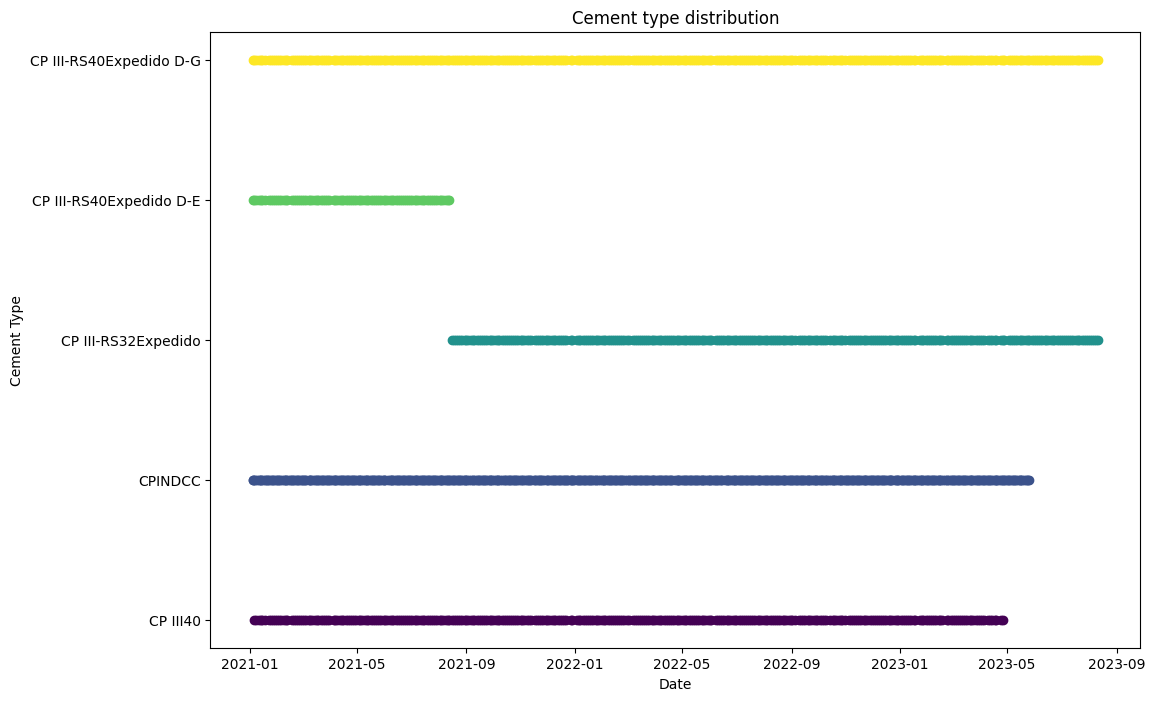

<IPython.core.display.Javascript object>

In [38]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [39]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP III40
CPINDCC
CP III-RS32Expedido
CP III-RS40Expedido D-E
CP III-RS40Expedido D-G


<IPython.core.display.Javascript object>

In [40]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC")].groupby(
    "Cement_Type"
)["CS28"].describe()

count       mean       std   min   25%   50%   75%   max
Cement_Type                                                          
CPINDCC      612.0  50.651797  2.462886  43.2  49.1  50.5  52.3  57.5

<IPython.core.display.Javascript object>

In [41]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC") |
(df["Cement_Type"] == "CP I40Expedido")
  ].groupby("Cement_Type")["CS28"].describe()


count       mean       std   min   25%   50%   75%   max
Cement_Type                                                          
CPINDCC      612.0  50.651797  2.462886  43.2  49.1  50.5  52.3  57.5

<IPython.core.display.Javascript object>

In [42]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")    
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [43]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP I            612
CP III-32 RS    299
CP III-40       346
CP III-40 RS    485
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1800879/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


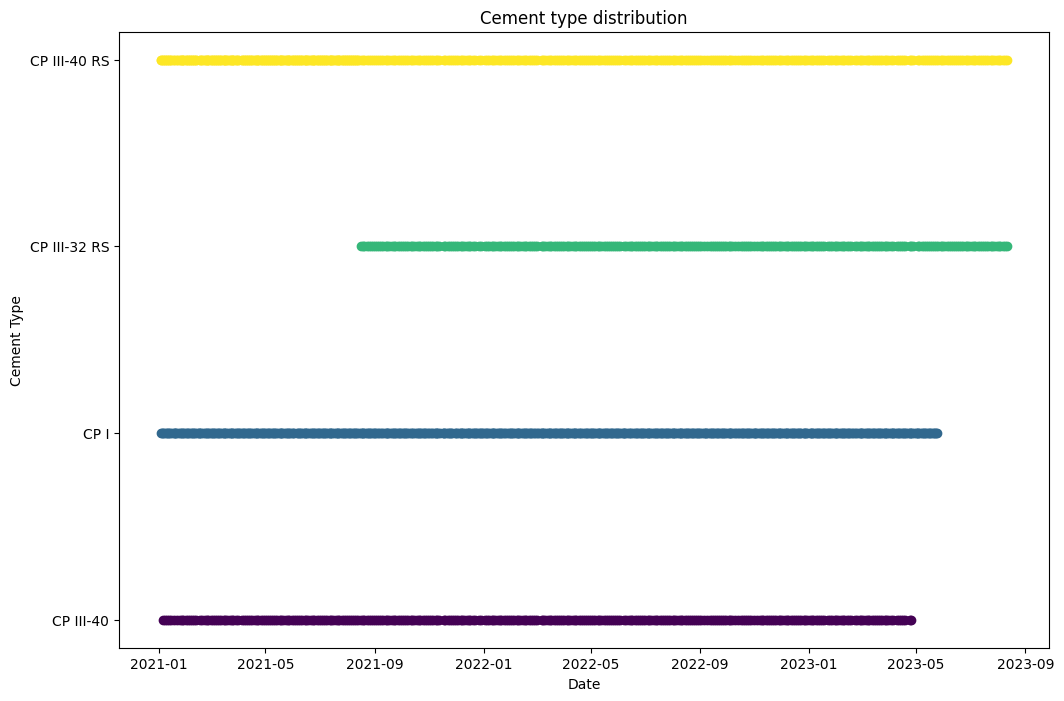

<IPython.core.display.Javascript object>

In [44]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [45]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

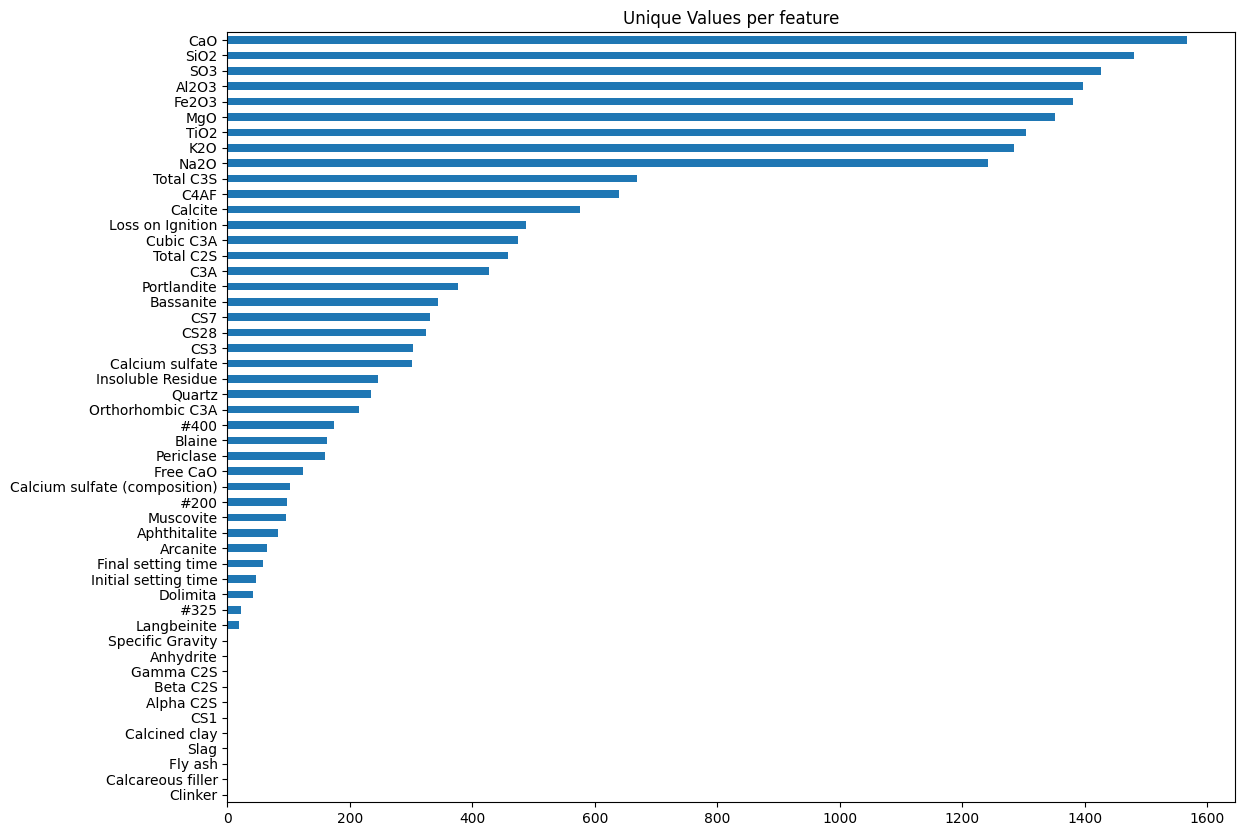

<IPython.core.display.Javascript object>

In [46]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

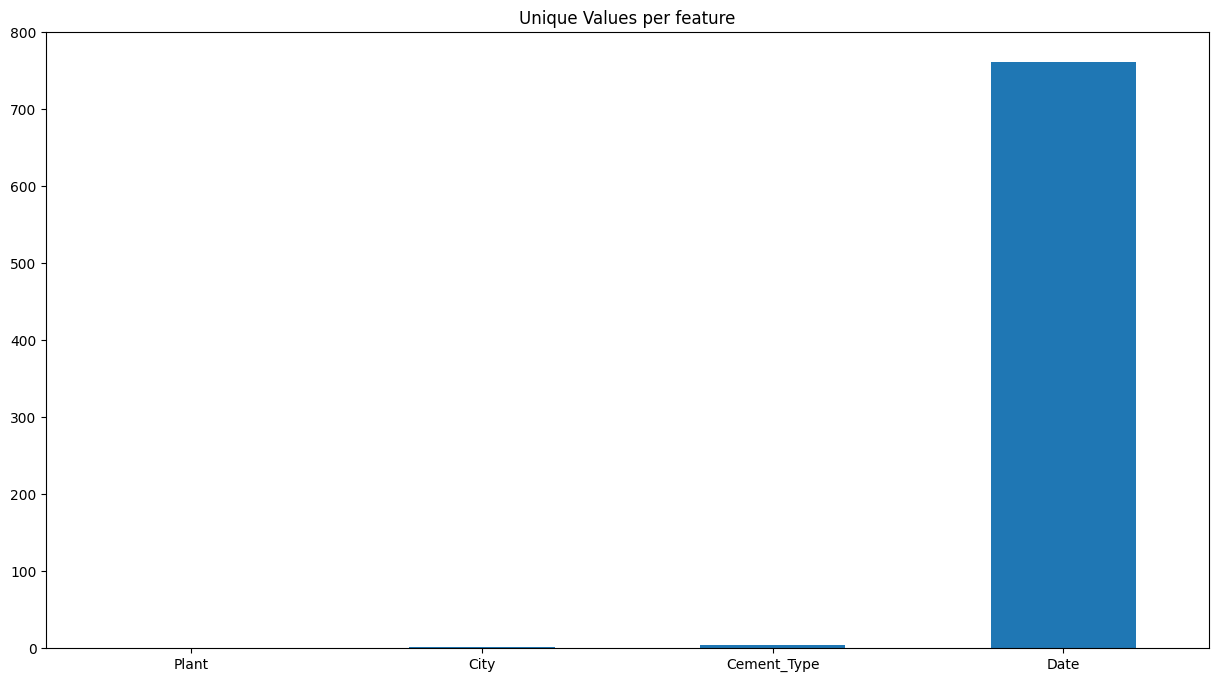

<IPython.core.display.Javascript object>

In [47]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

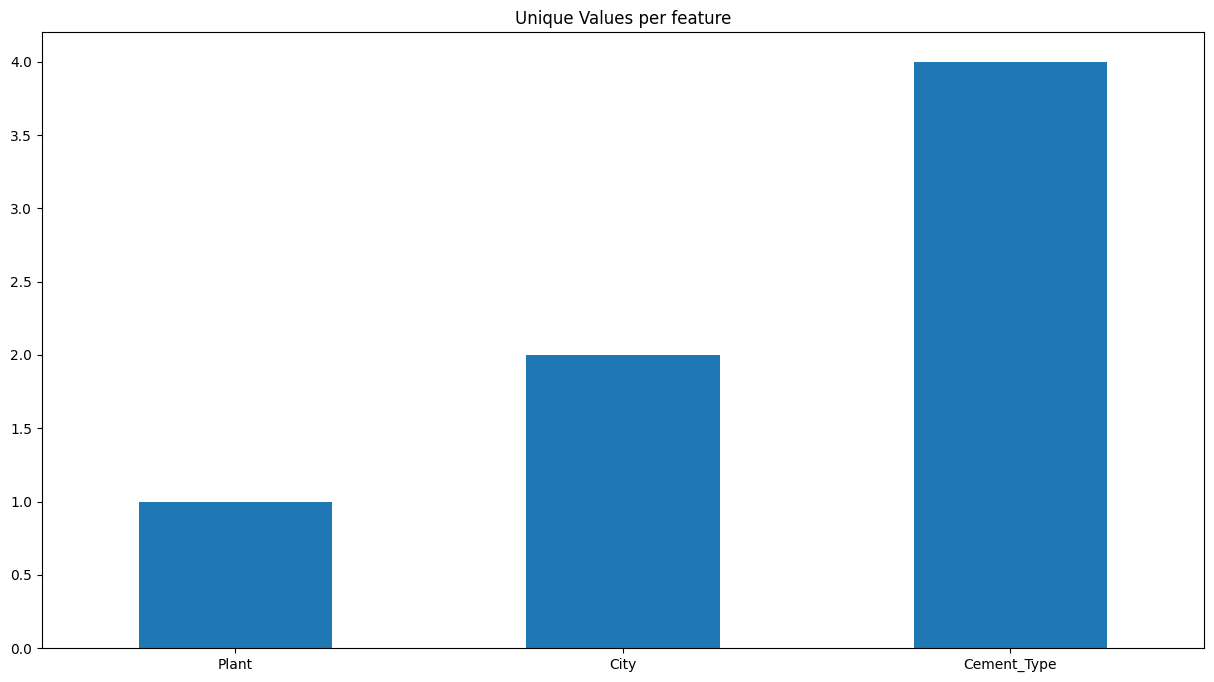

<IPython.core.display.Javascript object>

In [48]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [49]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 35 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [50]:
df.isna().any()

Plant                            False
City                             False
Date                             False
Clinker                           True
Calcareous filler                 True
Fly ash                           True
Slag                              True
Calcined clay                     True
Calcium sulfate (composition)     True
Total C3S                         True
Total C2S                         True
Alpha C2S                         True
Beta C2S                          True
Gamma C2S                         True
C4AF                              True
C3A                               True
Cubic C3A                         True
Orthorhombic C3A                  True
Free CaO                          True
Portlandite                       True
Periclase                         True
Arcanite                          True
Aphthitalite                      True
Langbeinite                       True
Calcium sulfate                   True
Bassanite                

<IPython.core.display.Javascript object>

In [51]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [52]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

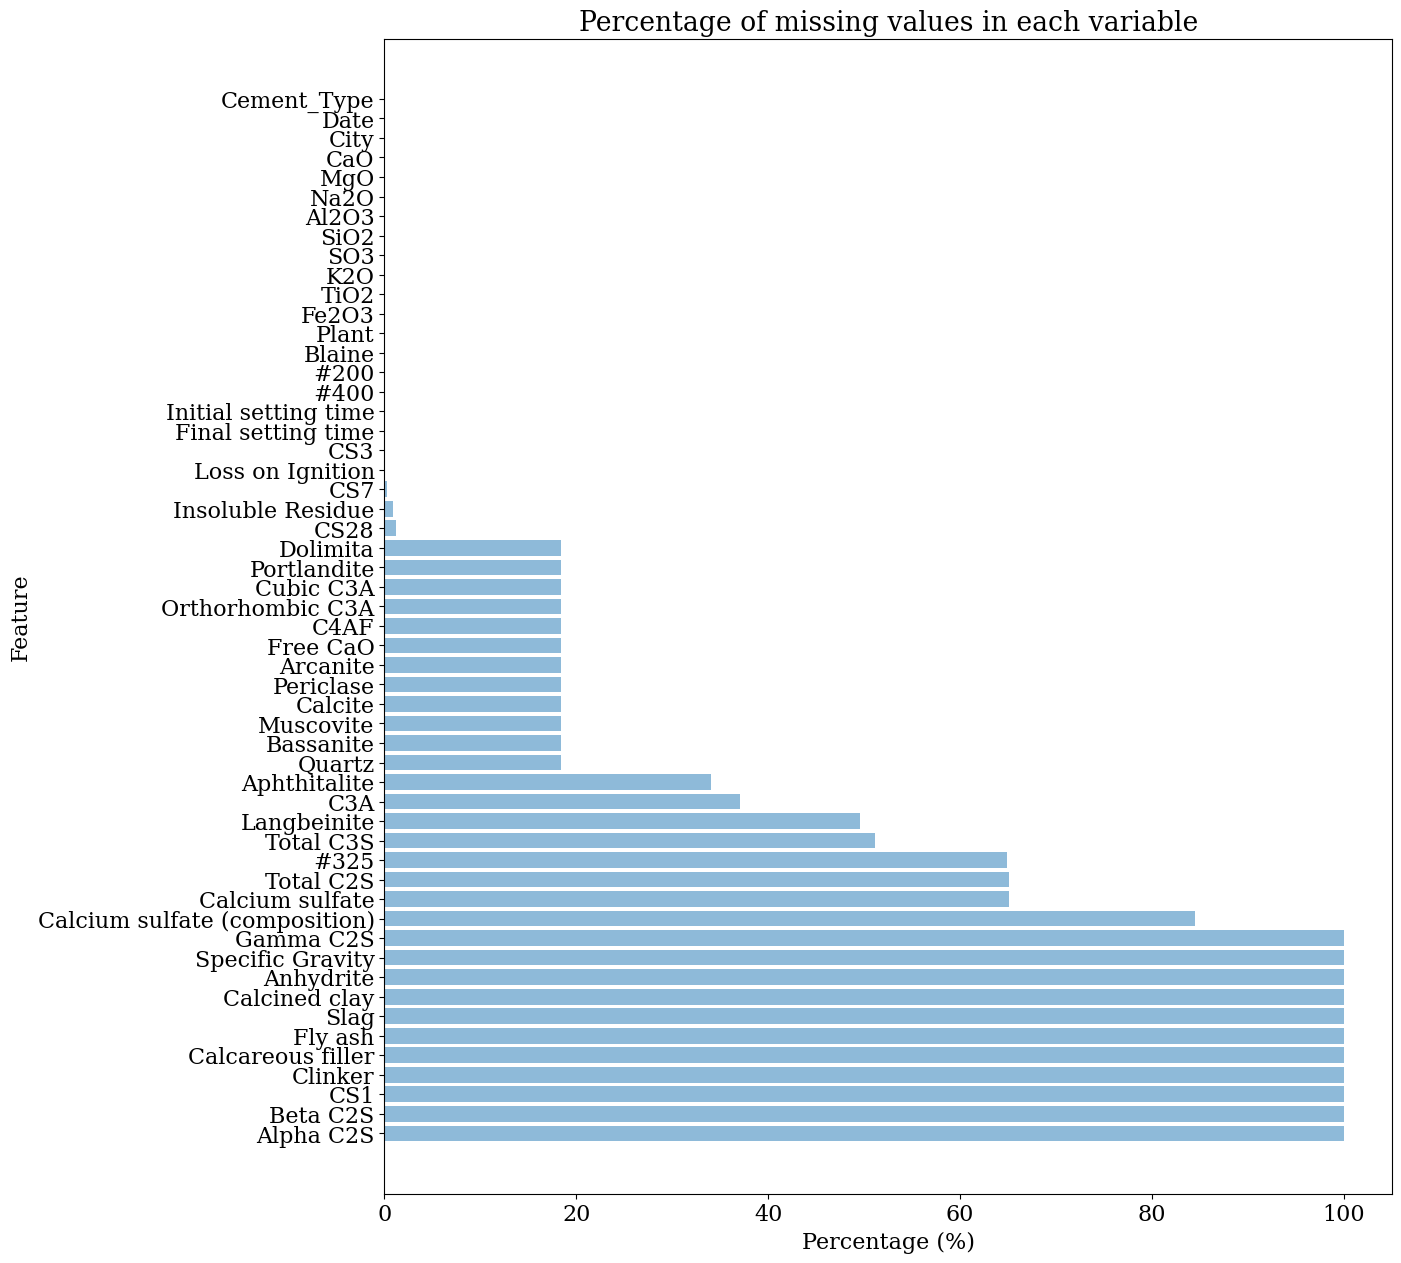

<IPython.core.display.Javascript object>

In [53]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [54]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [102]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['Clinker', 'Calcareous filler', 'Fly ash', 'Slag', 'Calcined clay',
       'Calcium sulfate (composition)', 'Total C3S', 'Total C2S', 'Alpha C2S',
       'Beta C2S', 'Gamma C2S', 'C4AF', 'C3A', 'Cubic C3A', 'Orthorhombic C3A',
       'Free CaO', 'Portlandite', 'Periclase', 'Arcanite', 'Aphthitalite',
       'Langbeinite', 'Calcium sulfate', 'Bassanite', 'Anhydrite', 'Calcite',
       'Dolimita', 'Quartz', 'Muscovite', 'CaO', 'MgO', 'Na2O', 'Al2O3',
       'SiO2', 'SO3', 'K2O', 'TiO2', 'Fe2O3', 'Loss on Ignition',
       'Insoluble Residue', 'Blaine', '#200', '#325', '#400',
       'Specific Gravity', 'Initial setting time', 'Final setting time', 'CS1',
       'CS3', 'CS7', 'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [127]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [121]:
zero_percentages

0.0

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [55]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

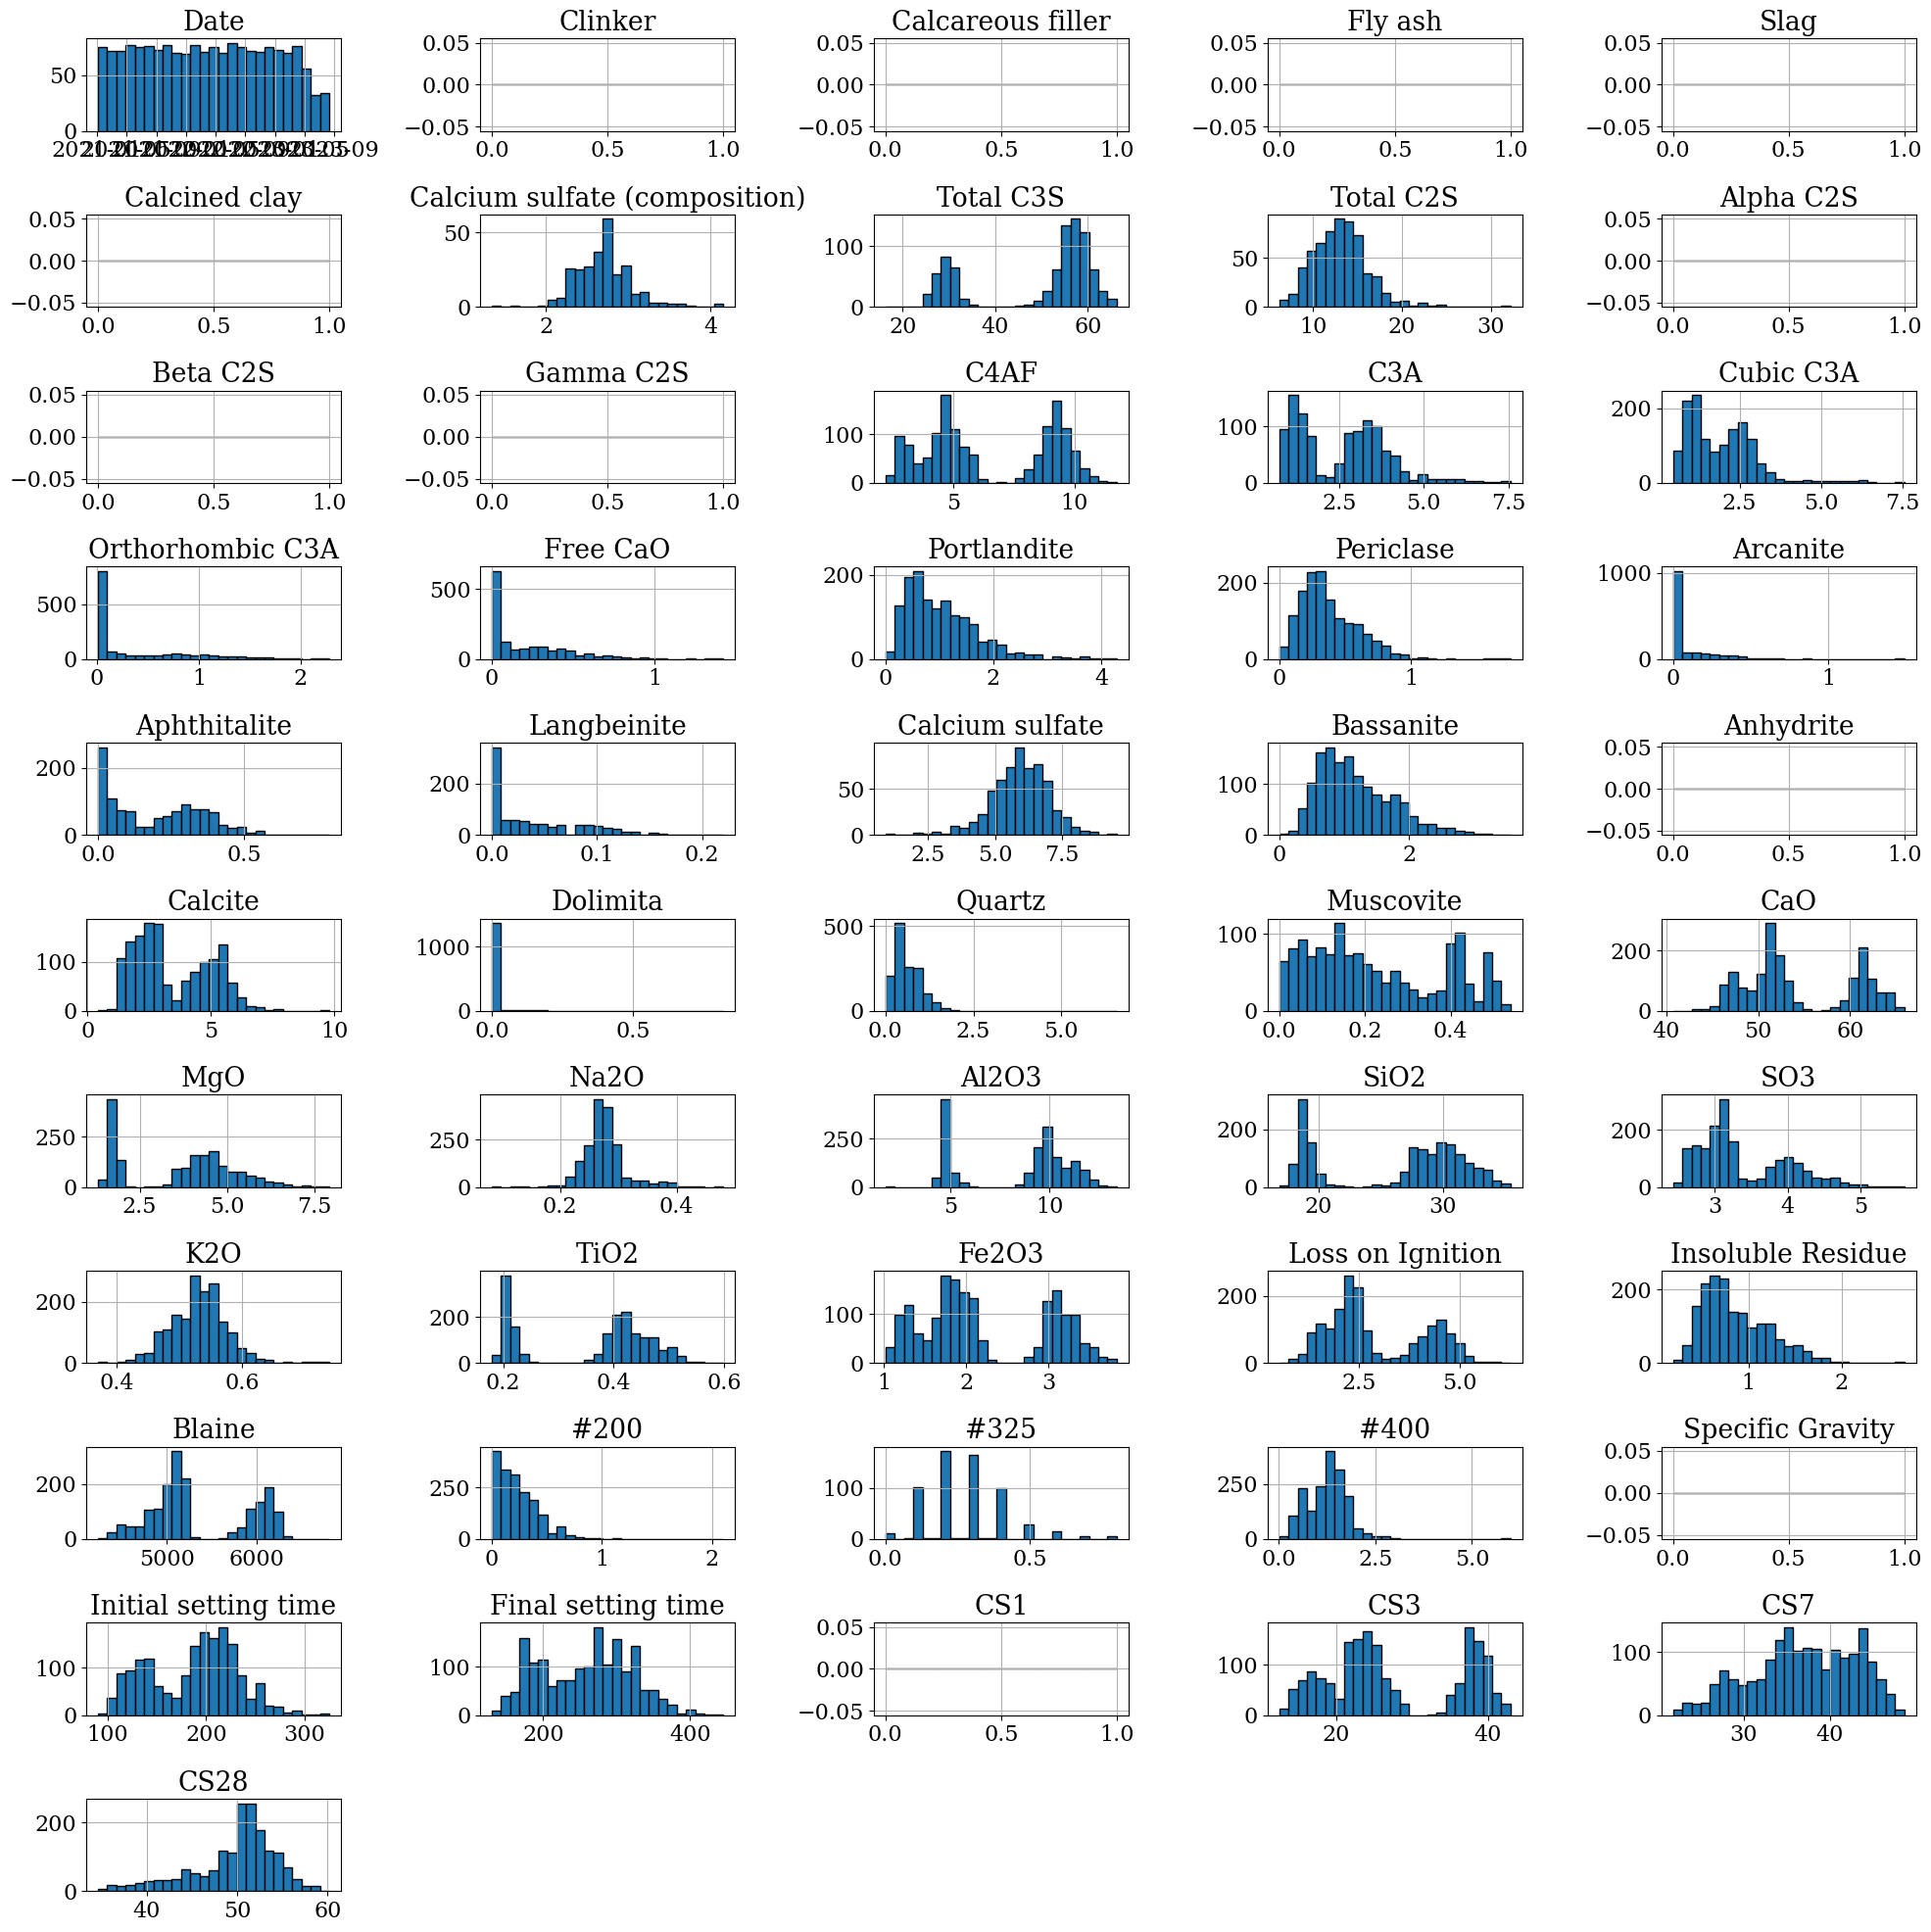

<IPython.core.display.Javascript object>

In [56]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

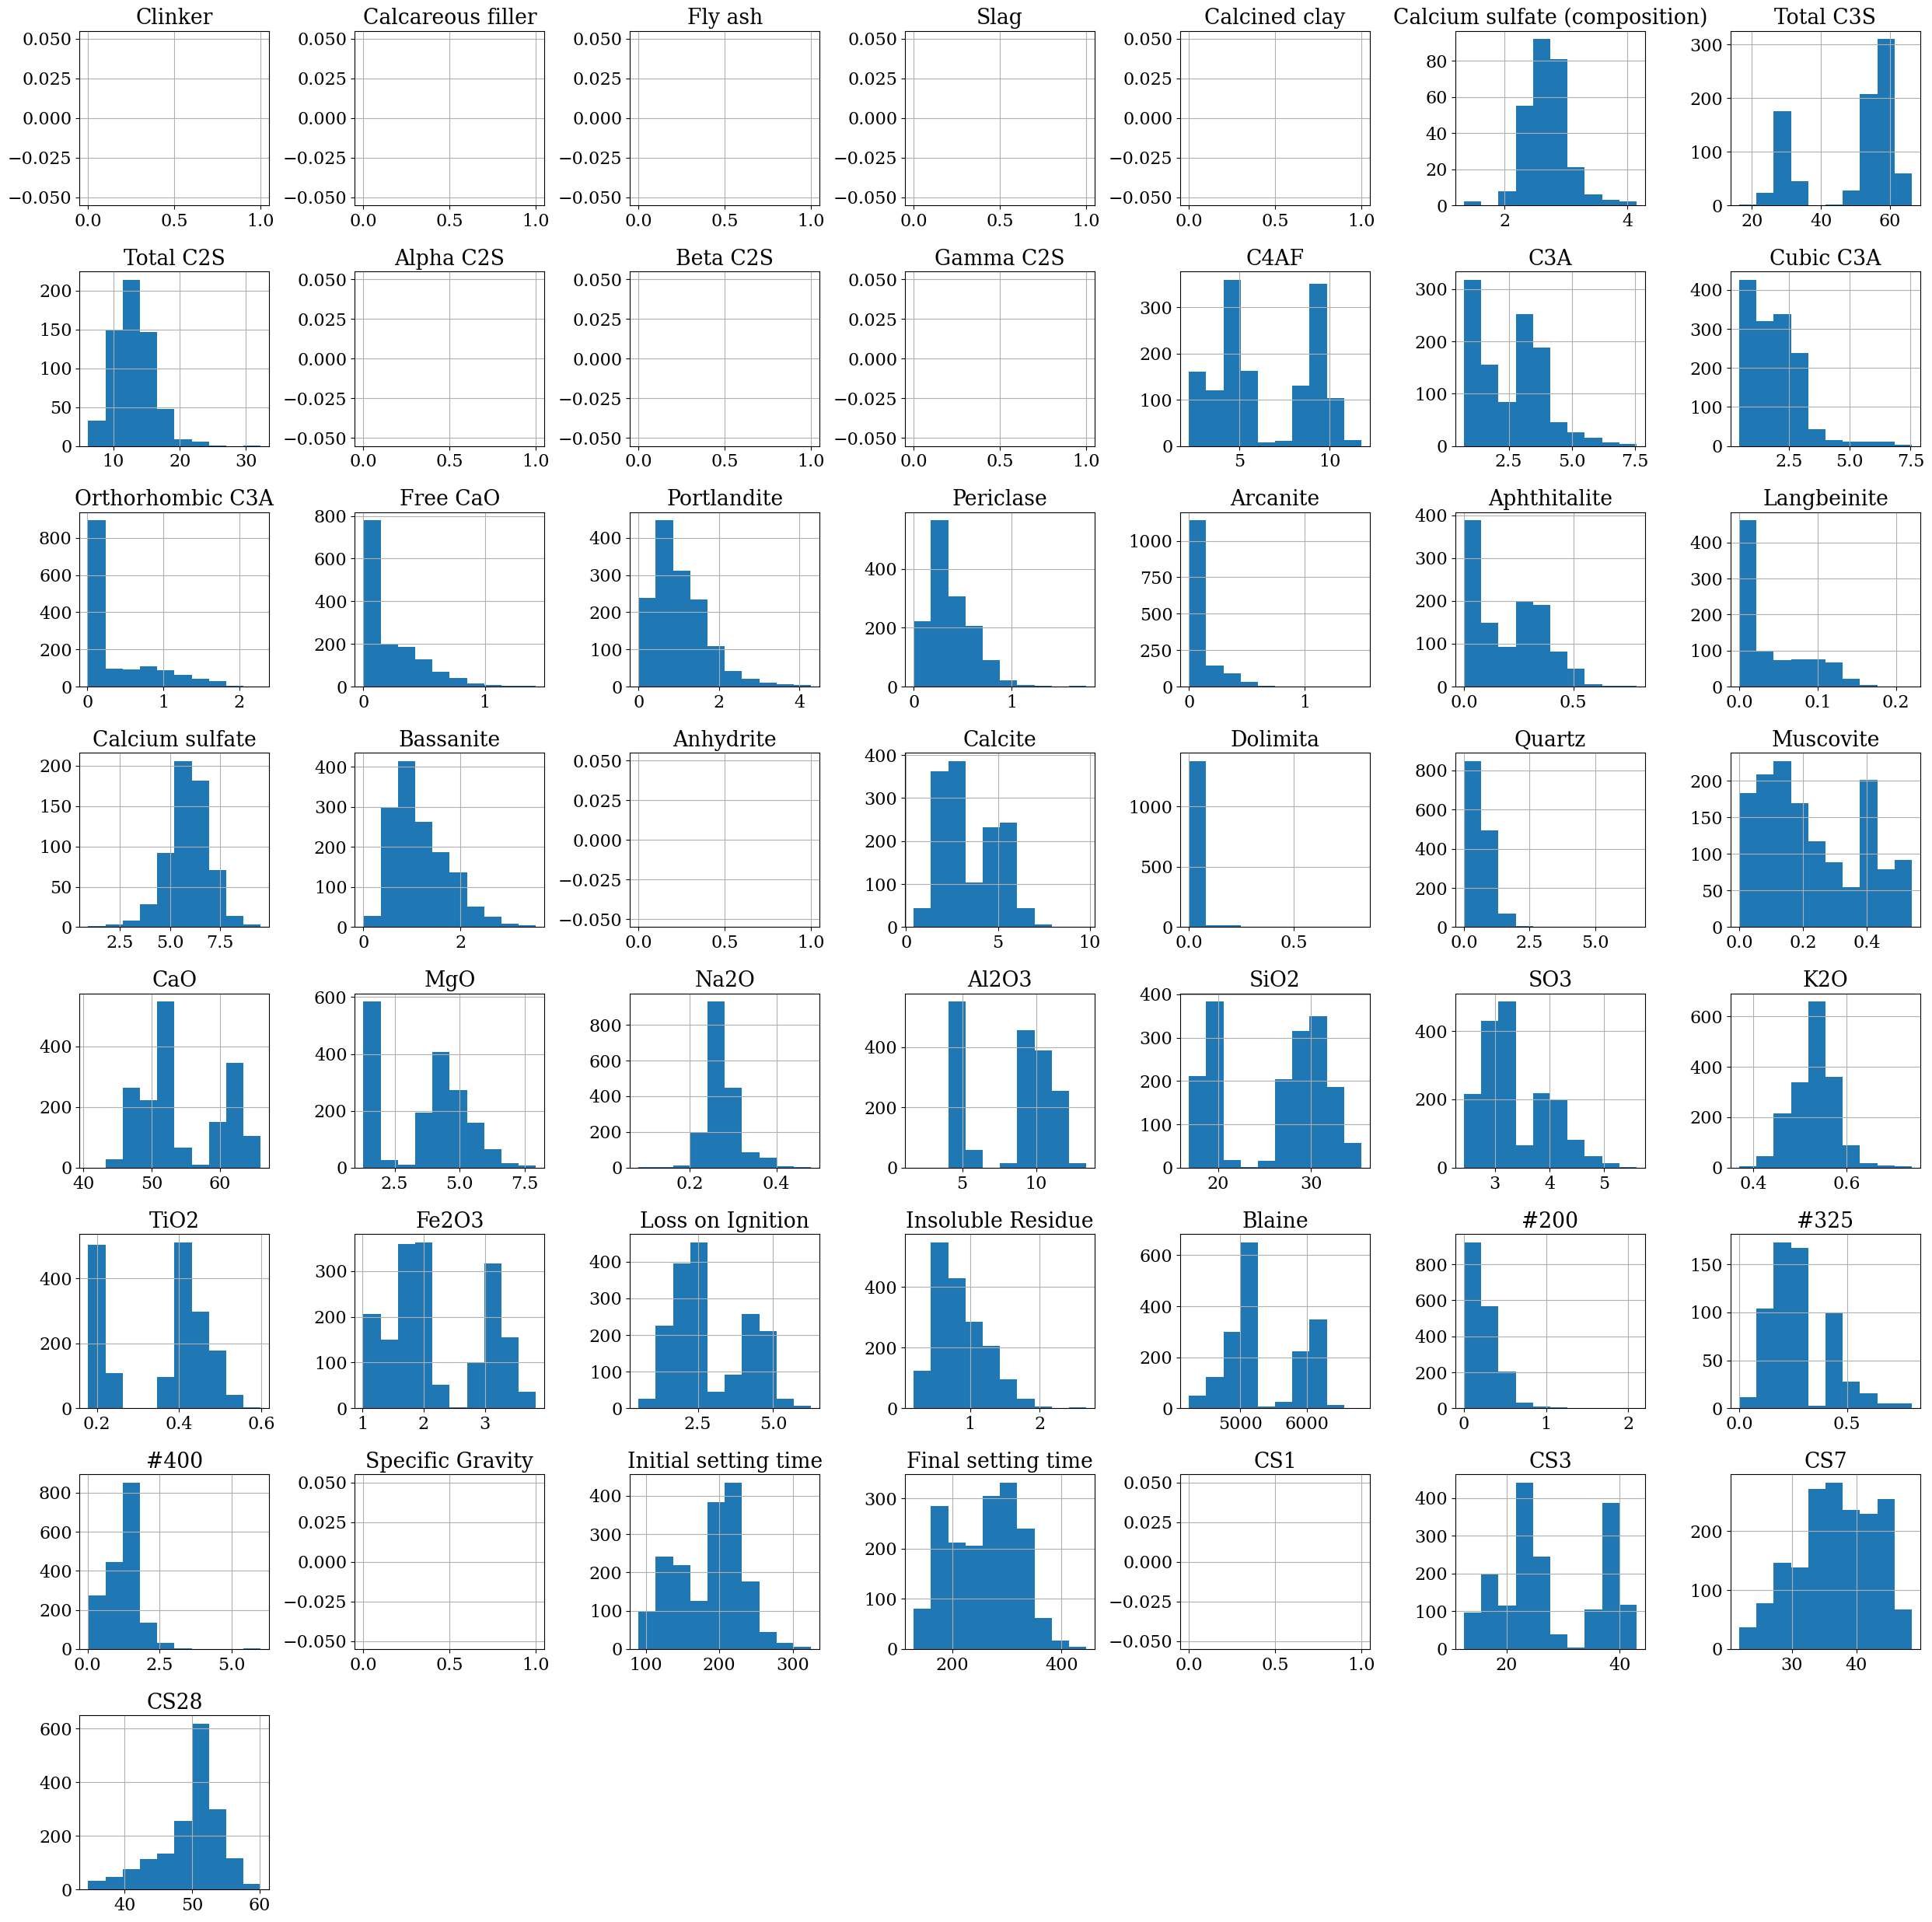

<IPython.core.display.Javascript object>

In [57]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

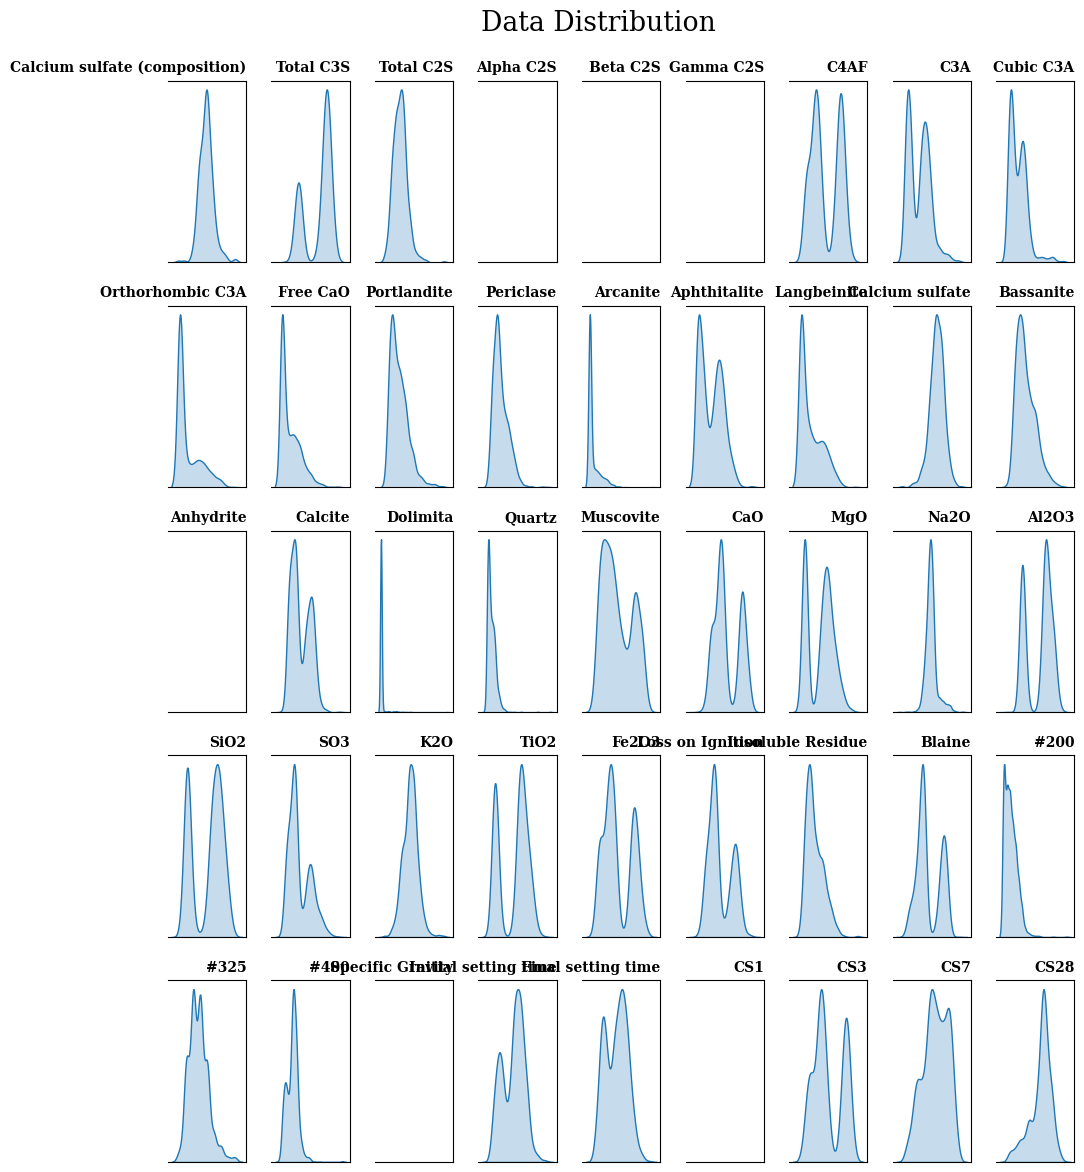

<IPython.core.display.Javascript object>

In [58]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(5, 9, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = (
    df.select_dtypes(include="float64")
    .select_dtypes(exclude=object)
    .drop(["Clinker", "Calcareous filler", "Fly ash", "Slag", "Calcined clay"], axis=1)
    .columns
)

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

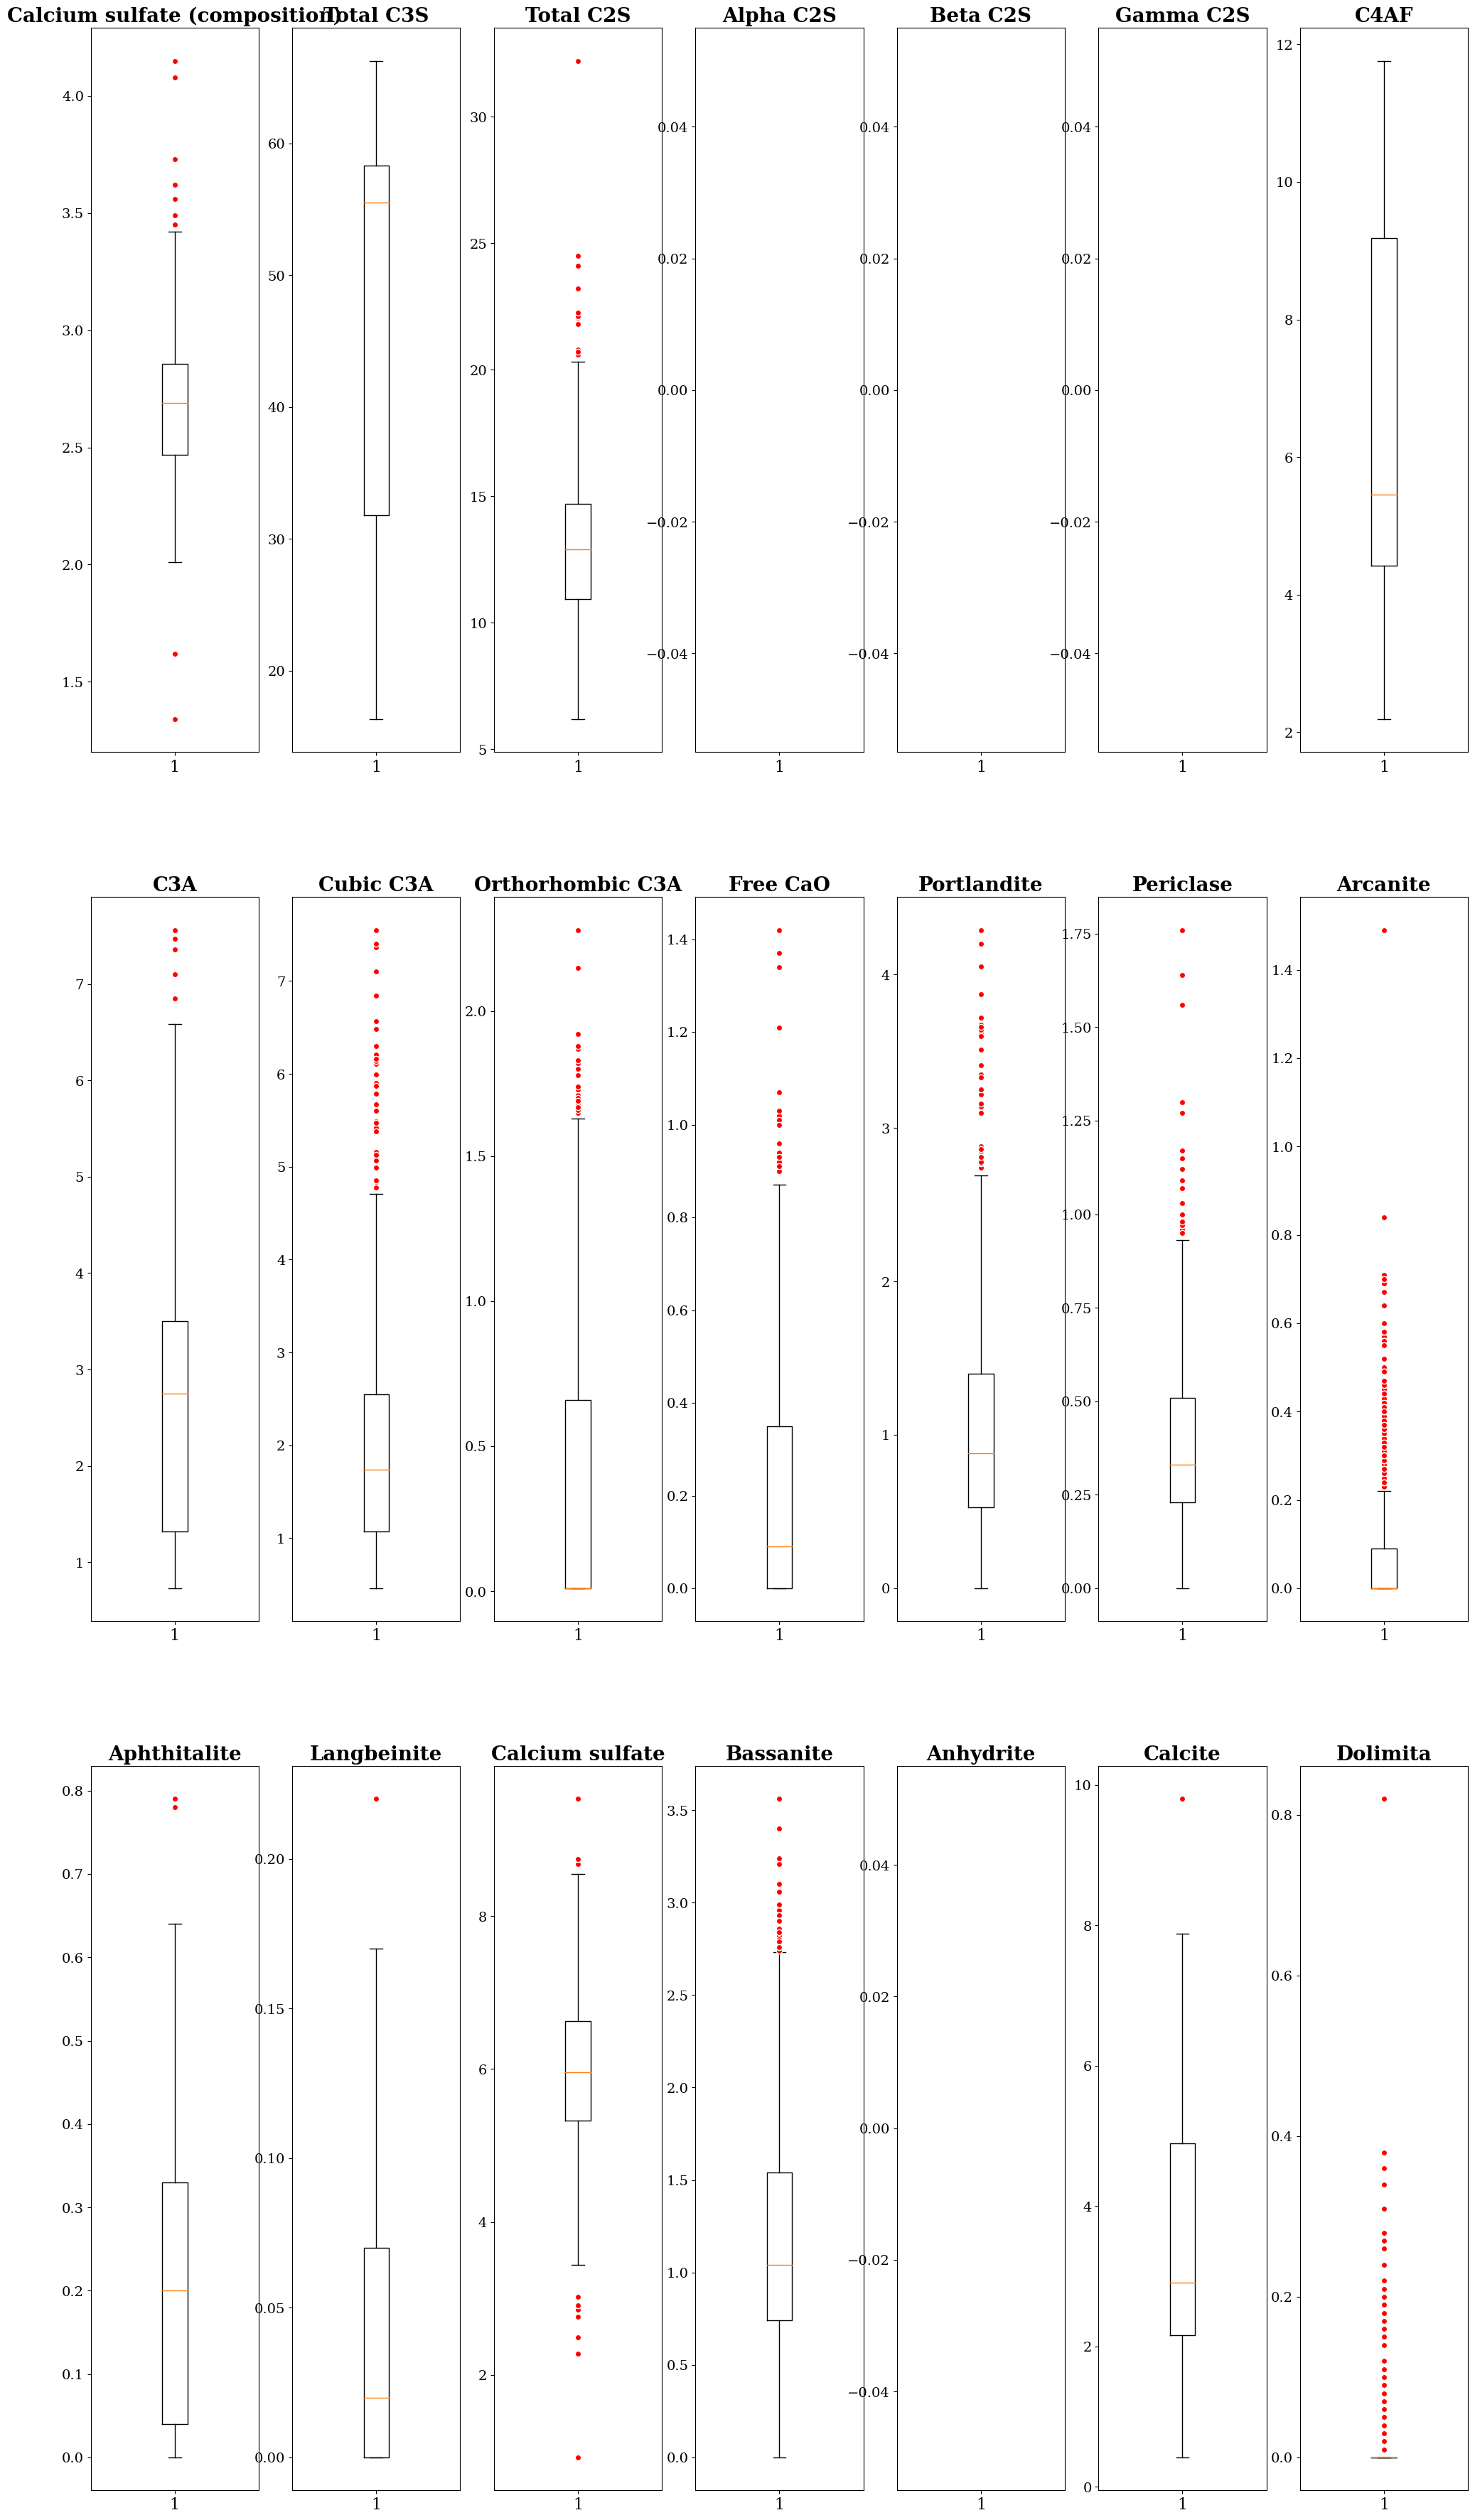

<IPython.core.display.Javascript object>

In [59]:
# Creating subplot of each column with its own scale
float64_columns = (
    df.select_dtypes(include="float64")
    .drop(["Clinker", "Calcareous filler", "Fly ash", "Slag", "Calcined clay"], axis=1)
    .columns
)
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

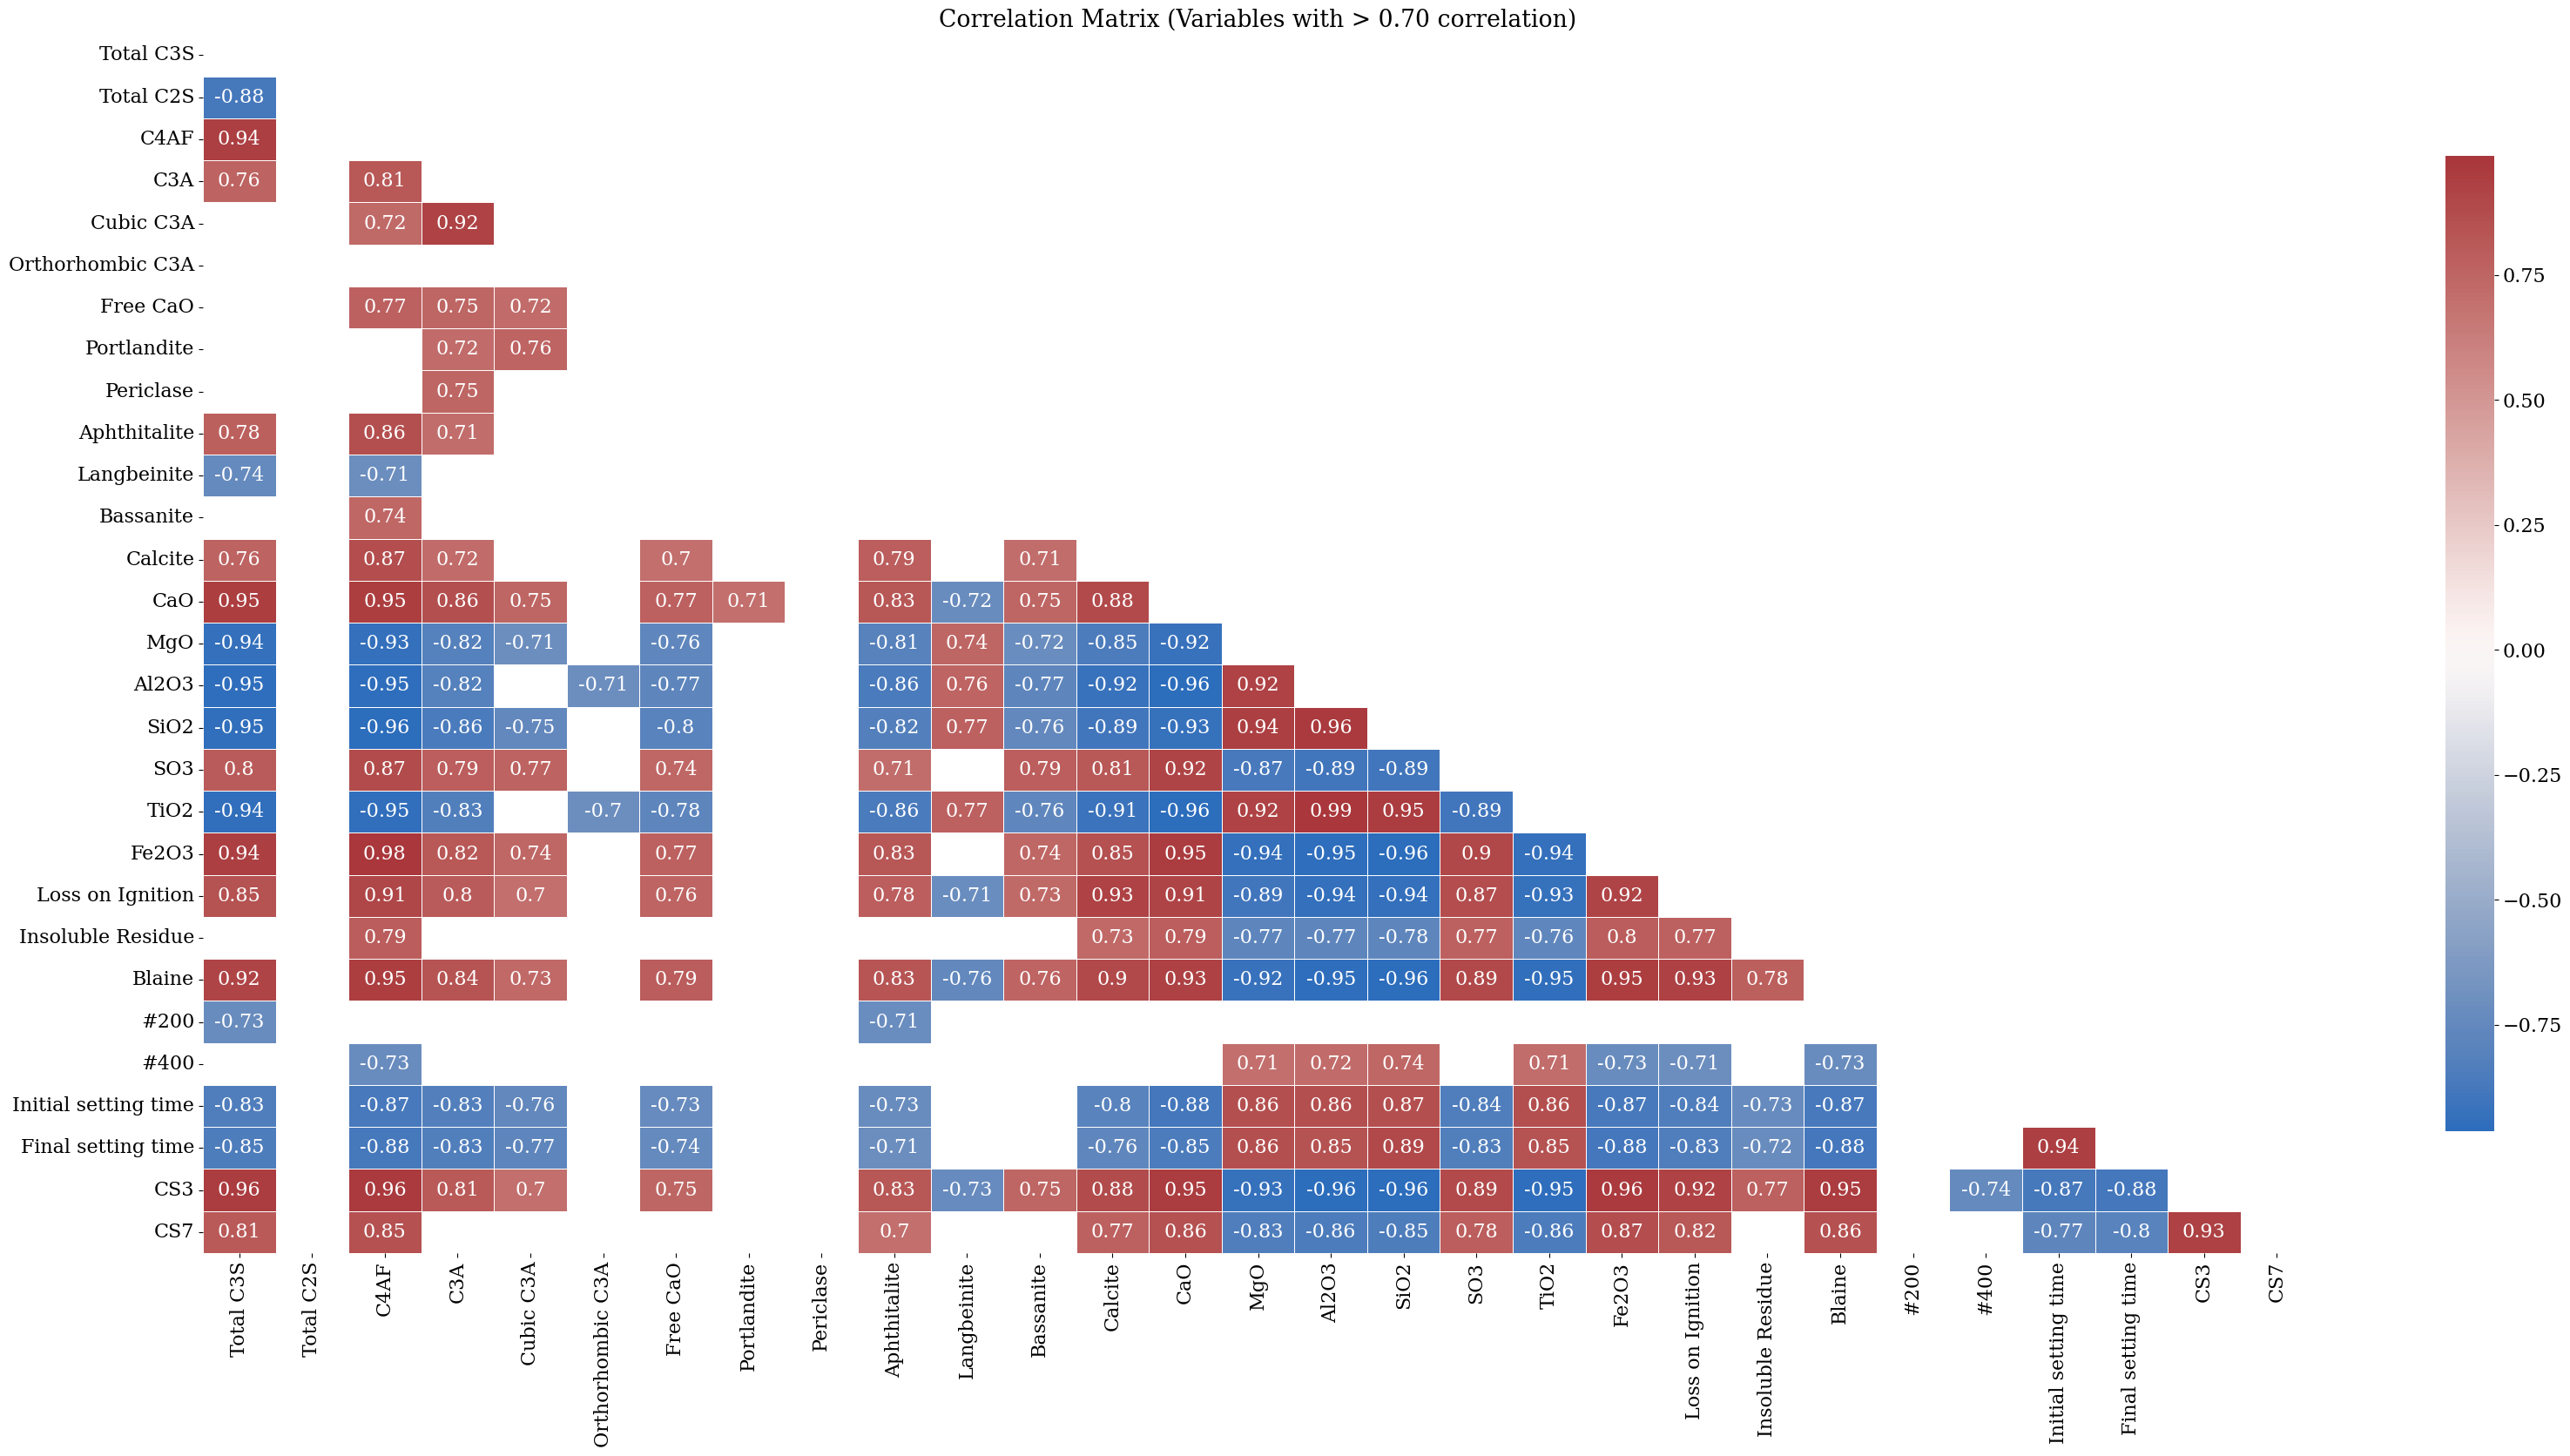

<IPython.core.display.Javascript object>

In [60]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [61]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Al2O3             TiO2                0.987869
C4AF              Fe2O3               0.977309
Fe2O3             CS3                 0.964598
SiO2              Blaine              0.963081
                  Fe2O3               0.961702
                                        ...   
Orthorhombic C3A  TiO2                0.704459
Free CaO          Calcite             0.704035
Cubic C3A         CS3                 0.702873
                  Loss on Ignition    0.701203
Aphthitalite      CS7                 0.700208
Length: 234, dtype: float64

<IPython.core.display.Javascript object>

In [62]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.661914
CS3                            CS28    0.464214
C3A                            CS28    0.400674
Fe2O3                          CS28    0.390719
Final setting time             CS28    0.390251
MgO                            CS28    0.372545
Blaine                         CS28    0.358337
CaO                            CS28    0.351618
#400                           CS28    0.336530
SiO2                           CS28    0.326819
TiO2                           CS28    0.326513
Initial setting time           CS28    0.321235
Al2O3                          CS28    0.315971
Loss on Ignition               CS28    0.307953
SO3                            CS28    0.298327
C4AF                           CS28    0.297472
Aphthitalite                   CS28    0.291324
Total C3S                      CS28    0.282915
Langbeinite                    CS28    0.265194
Bassanite                      CS28    0.248577
Calcite                        CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

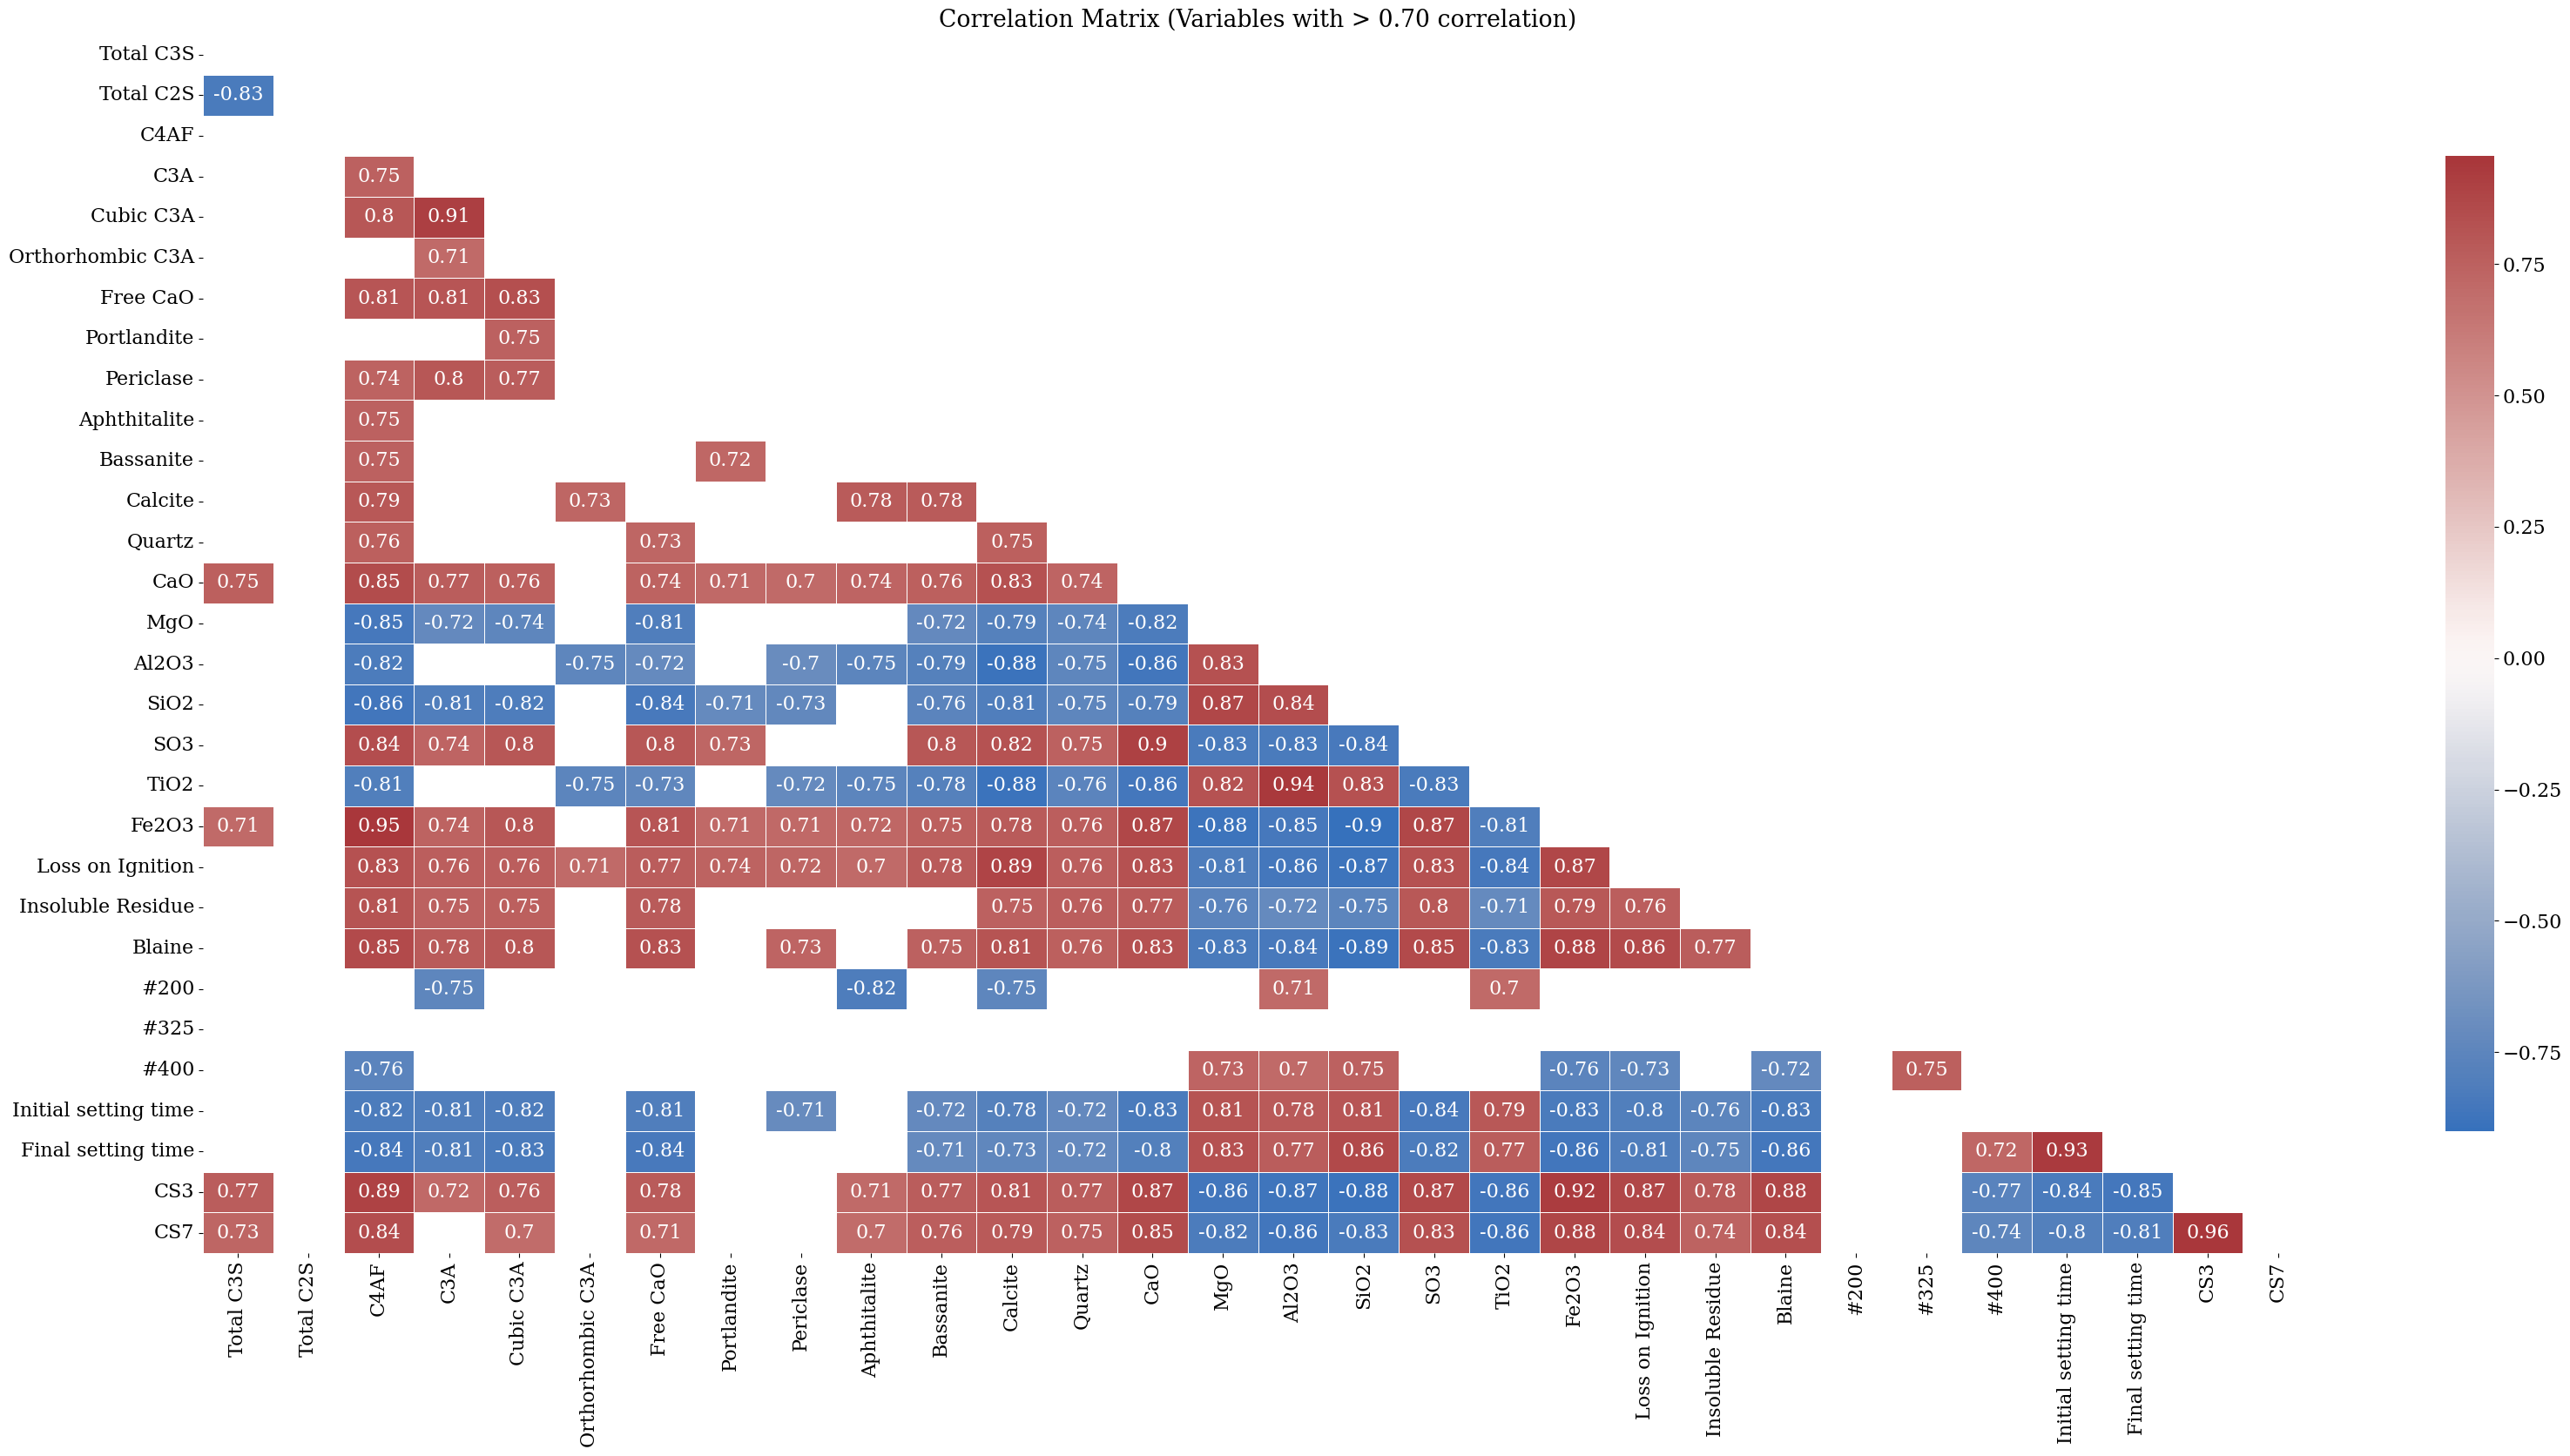

<IPython.core.display.Javascript object>

In [63]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [64]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                   CS7                   0.955589
C4AF                  Fe2O3                 0.945731
Al2O3                 TiO2                  0.939447
Initial setting time  Final setting time    0.929748
Fe2O3                 CS3                   0.919492
                                              ...   
Periclase             Al2O3                 0.702637
Aphthitalite          Loss on Ignition      0.702464
Al2O3                 #400                  0.702111
Aphthitalite          CS7                   0.700569
Cubic C3A             CS7                   0.700128
Length: 248, dtype: float64

<IPython.core.display.Javascript object>

In [65]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.517953
CS3                            CS28    0.476900
C3A                            CS28    0.406024
Fe2O3                          CS28    0.377354
Al2O3                          CS28    0.351089
TiO2                           CS28    0.343250
CaO                            CS28    0.337127
Blaine                         CS28    0.315290
MgO                            CS28    0.312412
SO3                            CS28    0.309321
Loss on Ignition               CS28    0.296692
SiO2                           CS28    0.293806
Langbeinite                    CS28    0.284976
Aphthitalite                   CS28    0.282396
C4AF                           CS28    0.281276
Final setting time             CS28    0.278217
Initial setting time           CS28    0.259590
#400                           CS28    0.246576
Bassanite                      CS28    0.243147
Insoluble Residue              CS28    0.186835
Calcite                        CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

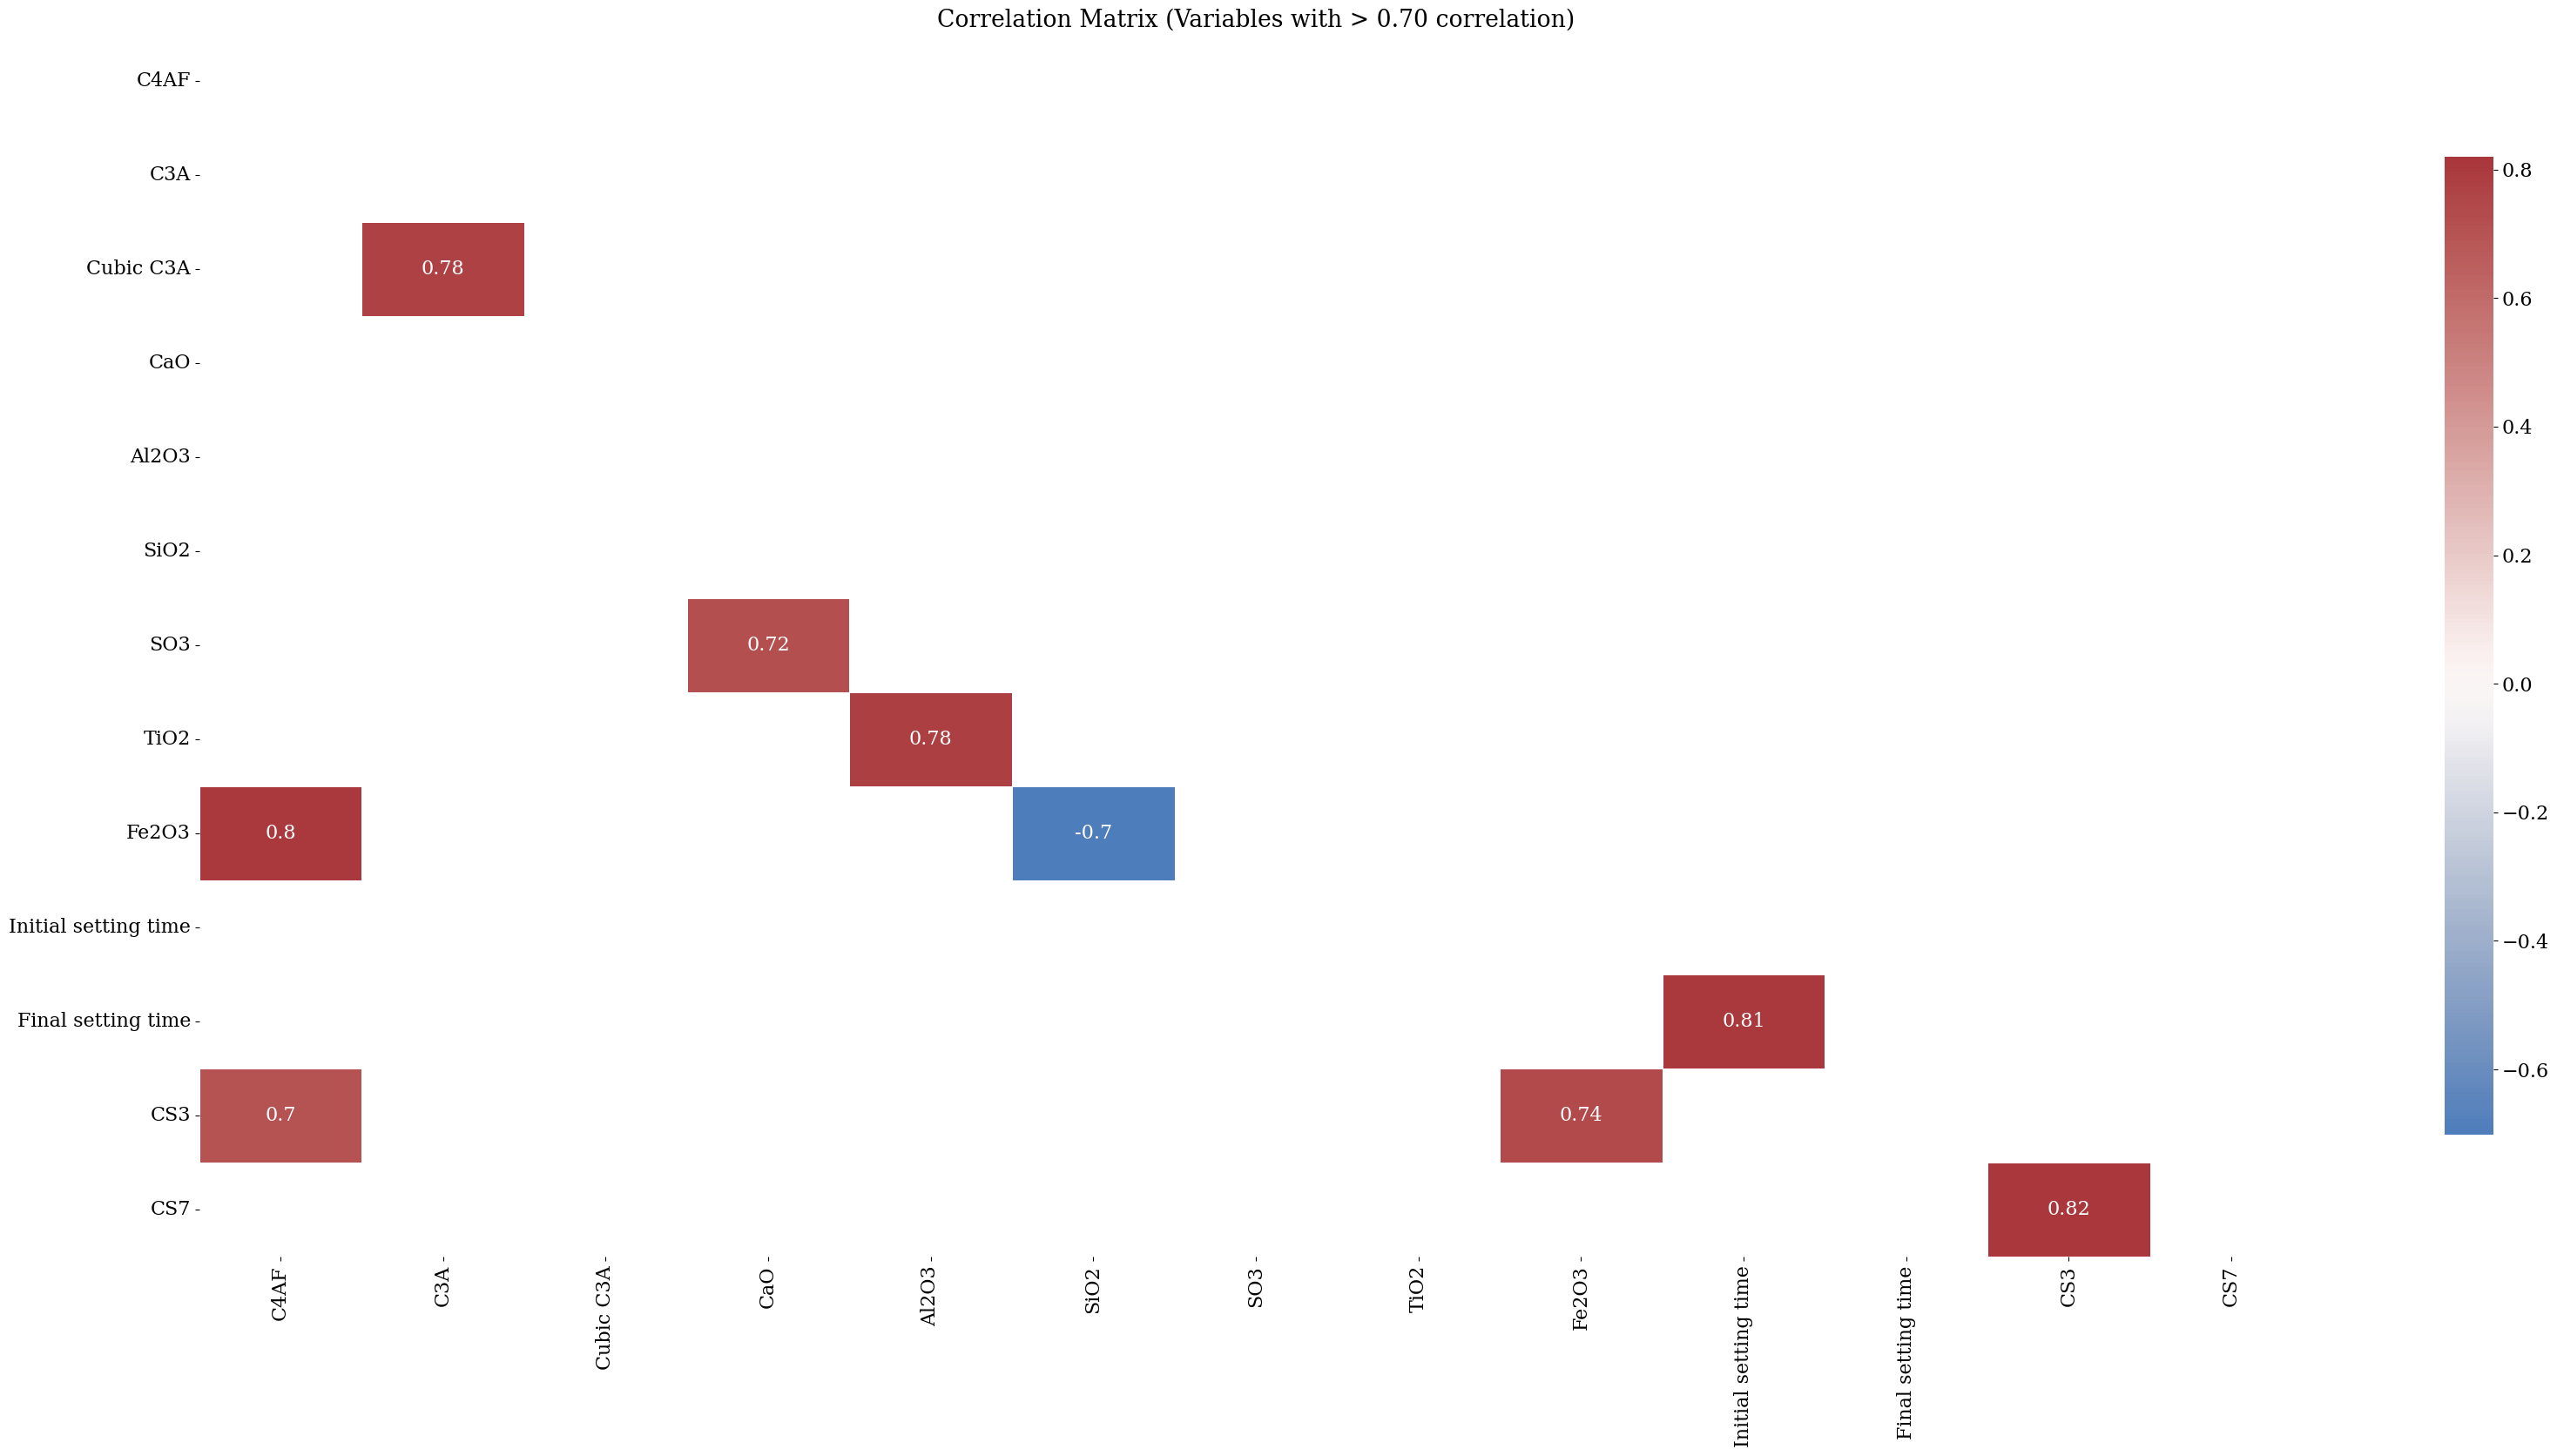

<IPython.core.display.Javascript object>

In [66]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [67]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                   CS7                   0.820334
Initial setting time  Final setting time    0.806925
C4AF                  Fe2O3                 0.803406
Al2O3                 TiO2                  0.782019
C3A                   Cubic C3A             0.778556
Fe2O3                 CS3                   0.738158
CaO                   SO3                   0.716011
C4AF                  CS3                   0.703766
SiO2                  Fe2O3                 0.701542
dtype: float64

<IPython.core.display.Javascript object>

In [68]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.385704
CS3                            CS28    0.350704
C3A                            CS28    0.282726
Fe2O3                          CS28    0.251062
Al2O3                          CS28    0.225807
TiO2                           CS28    0.223899
Blaine                         CS28    0.207861
Langbeinite                    CS28    0.206903
CaO                            CS28    0.203766
MgO                            CS28    0.195069
Aphthitalite                   CS28    0.192778
SiO2                           CS28    0.191084
Loss on Ignition               CS28    0.185275
Final setting time             CS28    0.184647
SO3                            CS28    0.181866
C4AF                           CS28    0.178055
#400                           CS28    0.164308
Initial setting time           CS28    0.156922
Bassanite                      CS28    0.153503
Insoluble Residue              CS28    0.111866
Quartz                         CS28    0

<IPython.core.display.Javascript object>

#### Bivariate Analysis

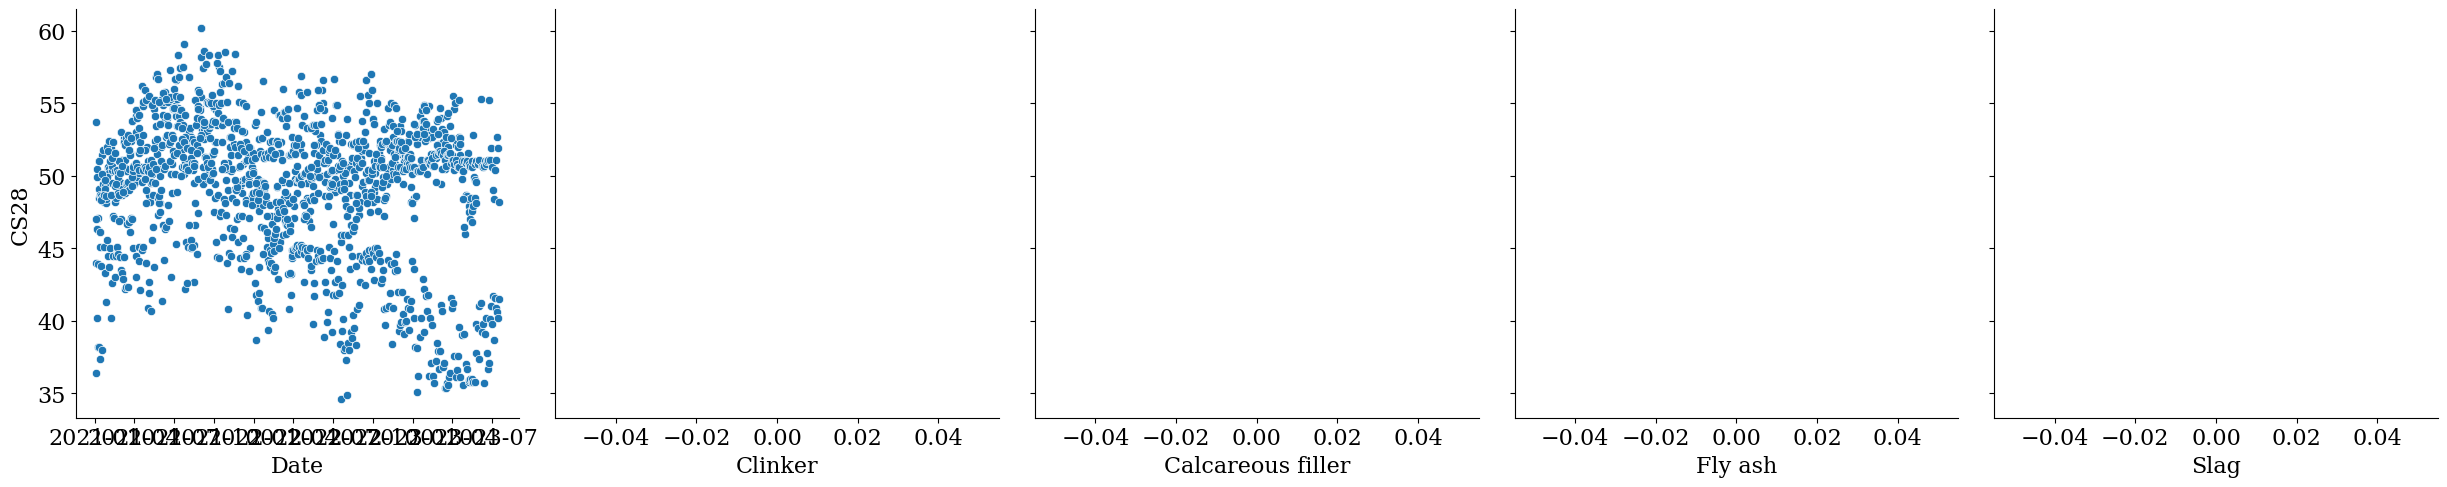

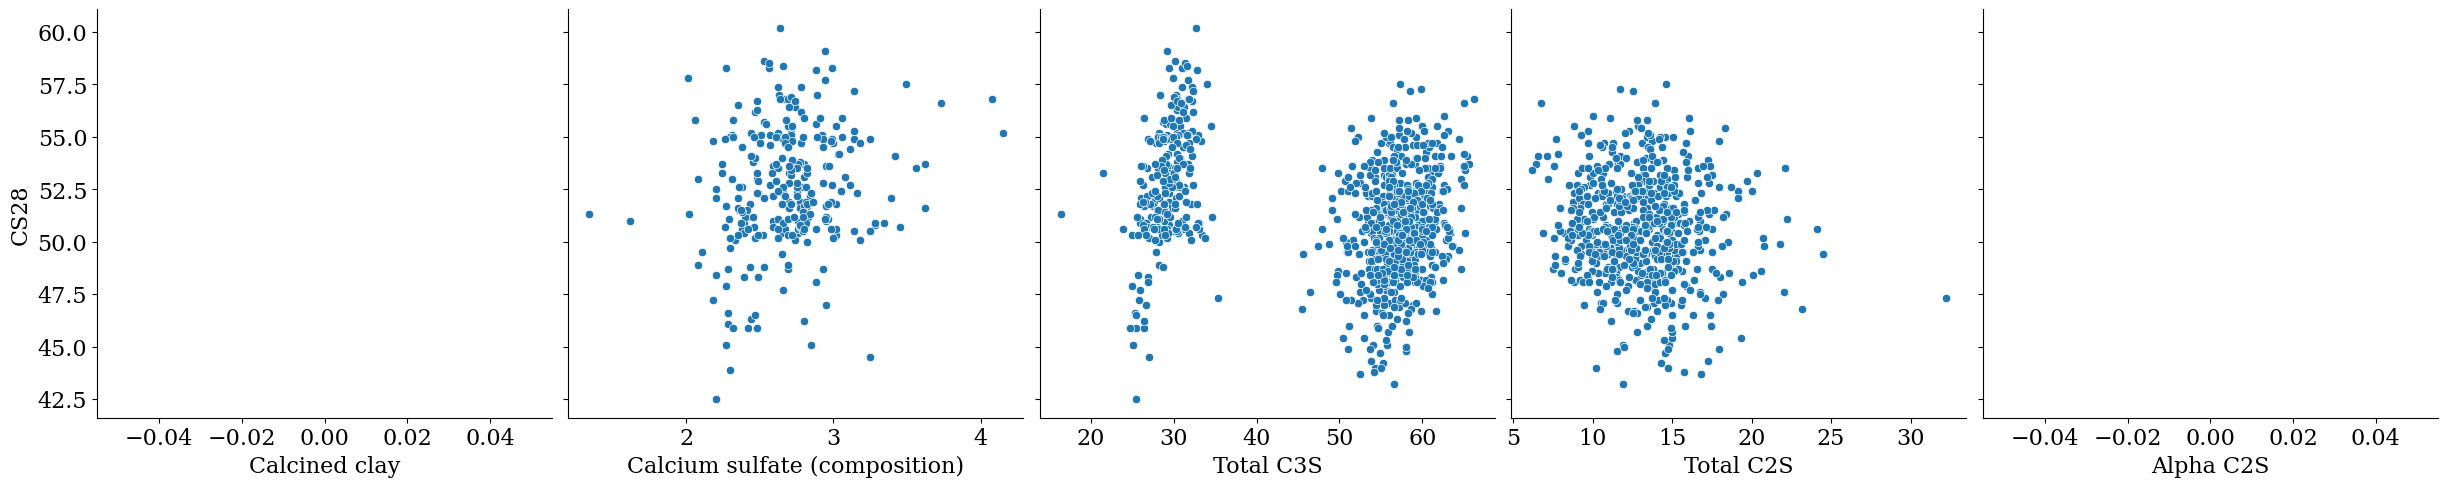

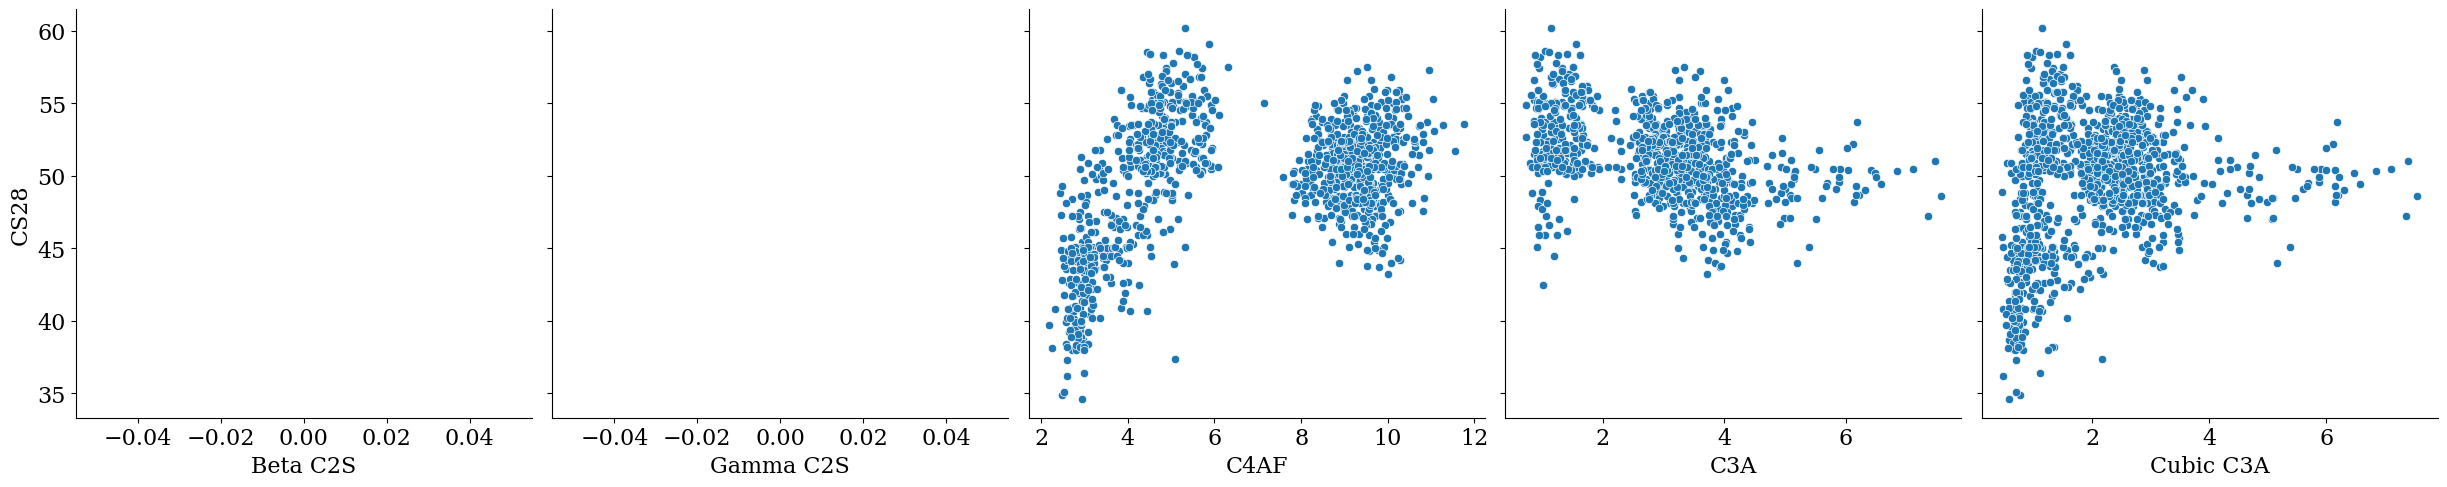

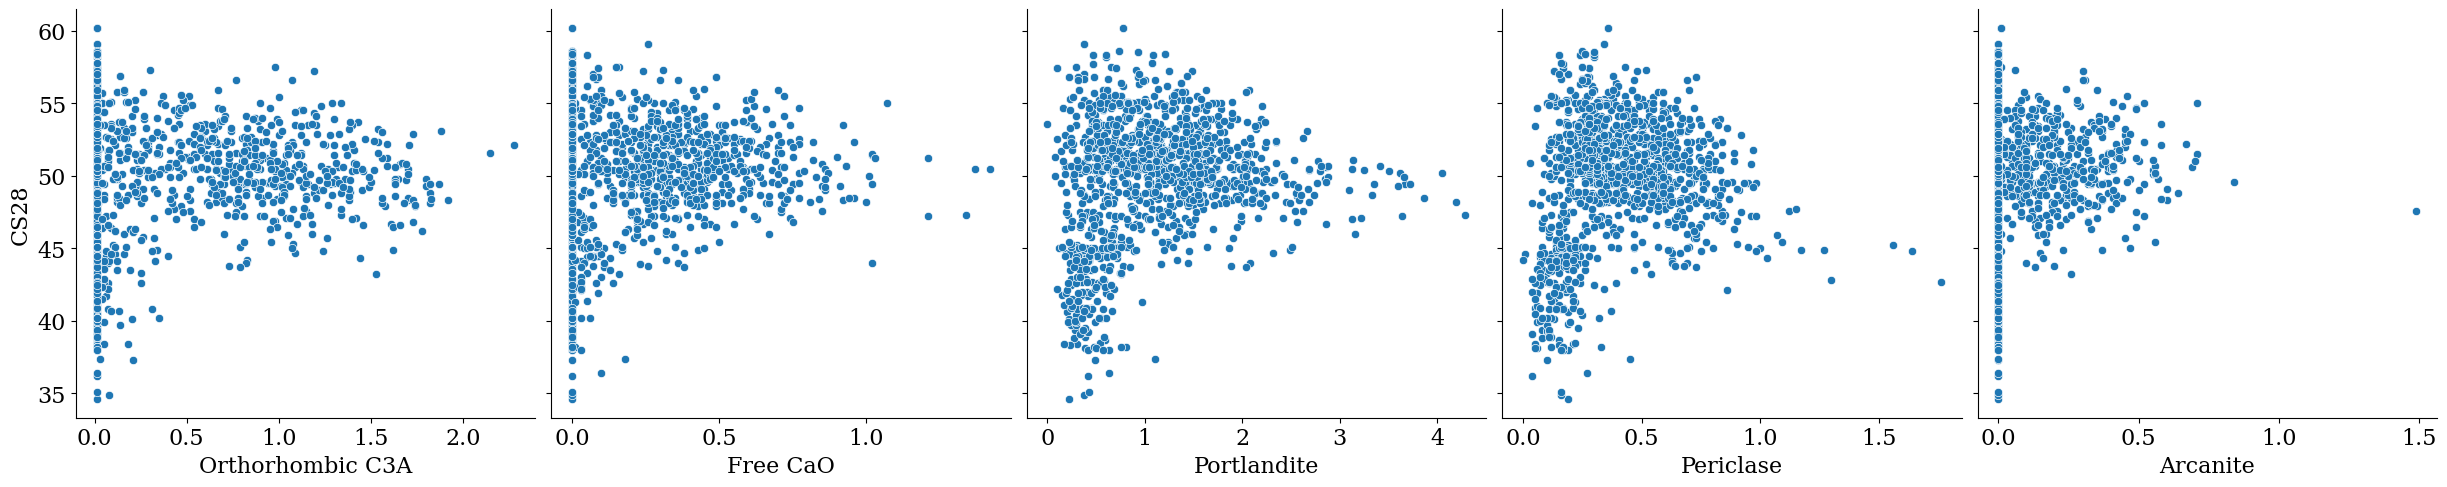

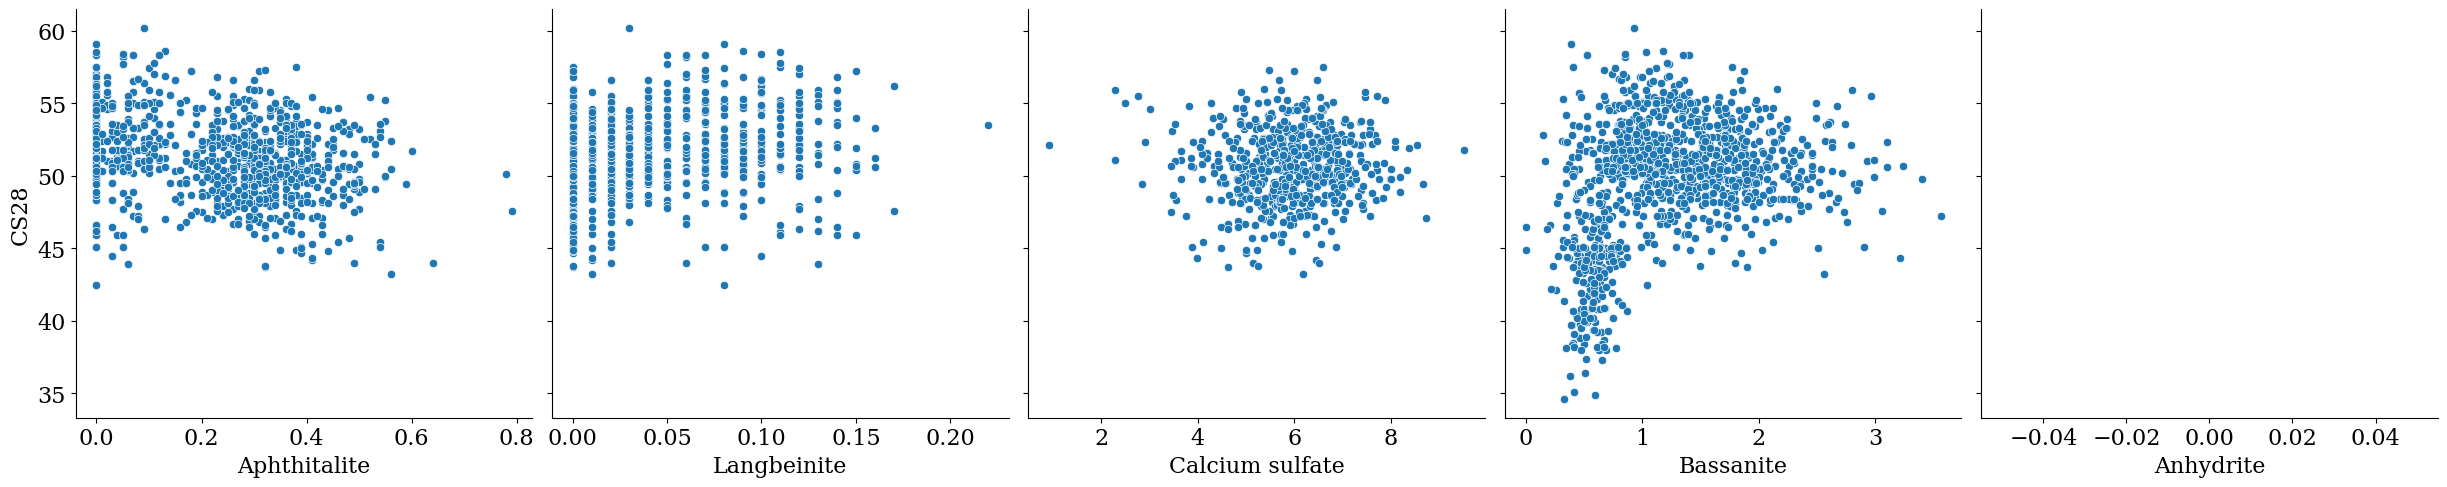

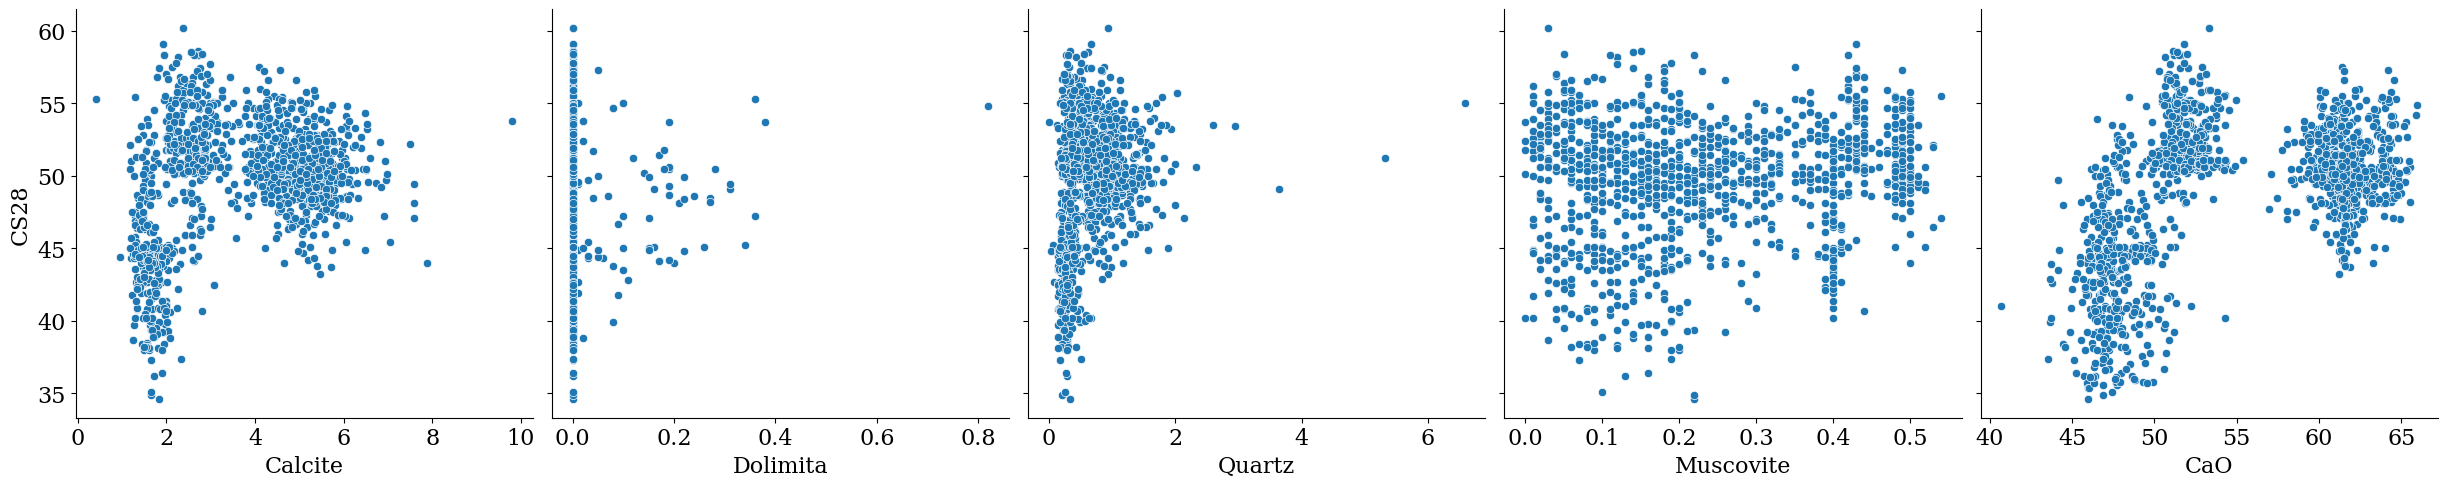

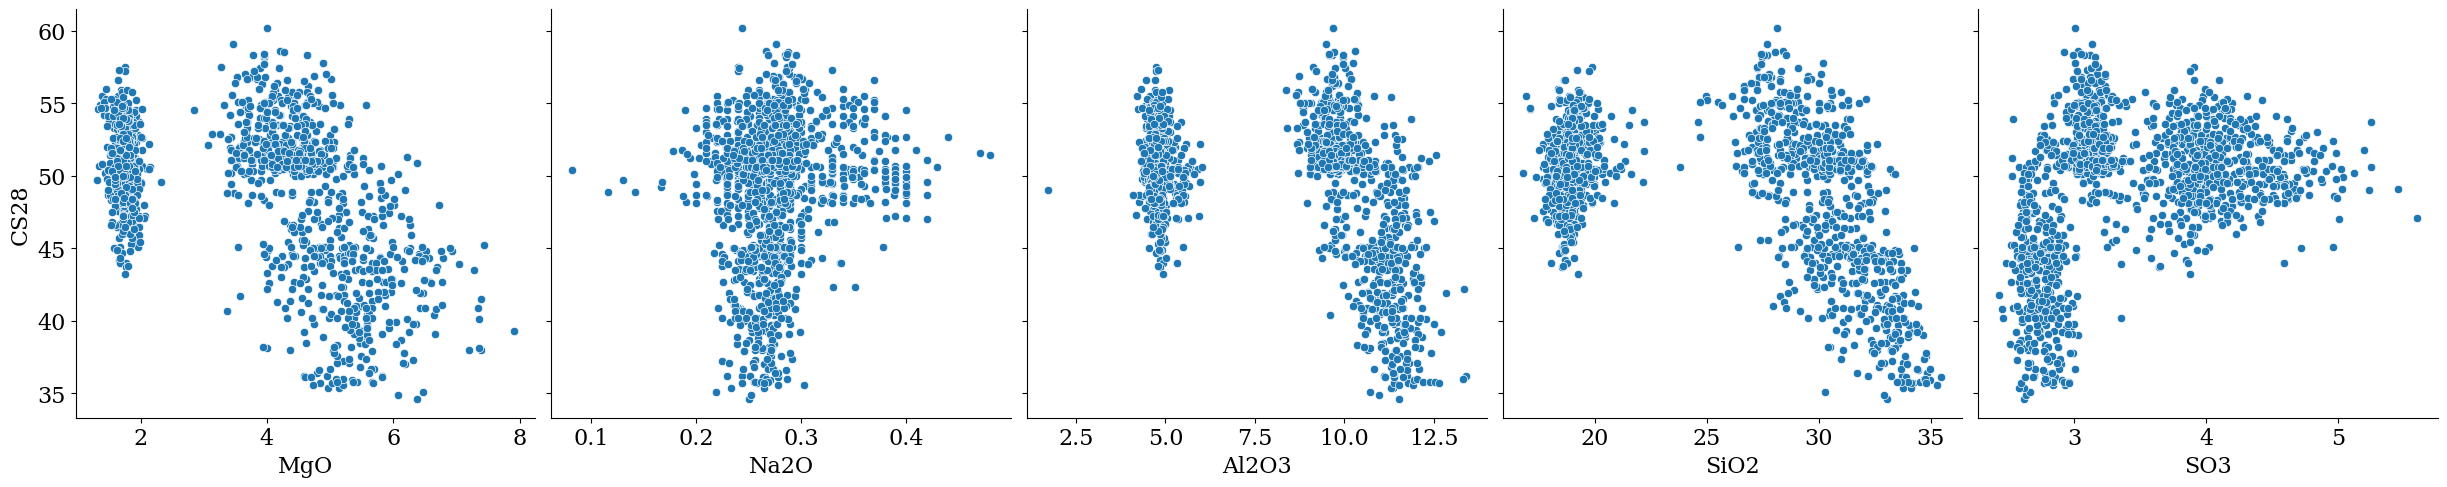

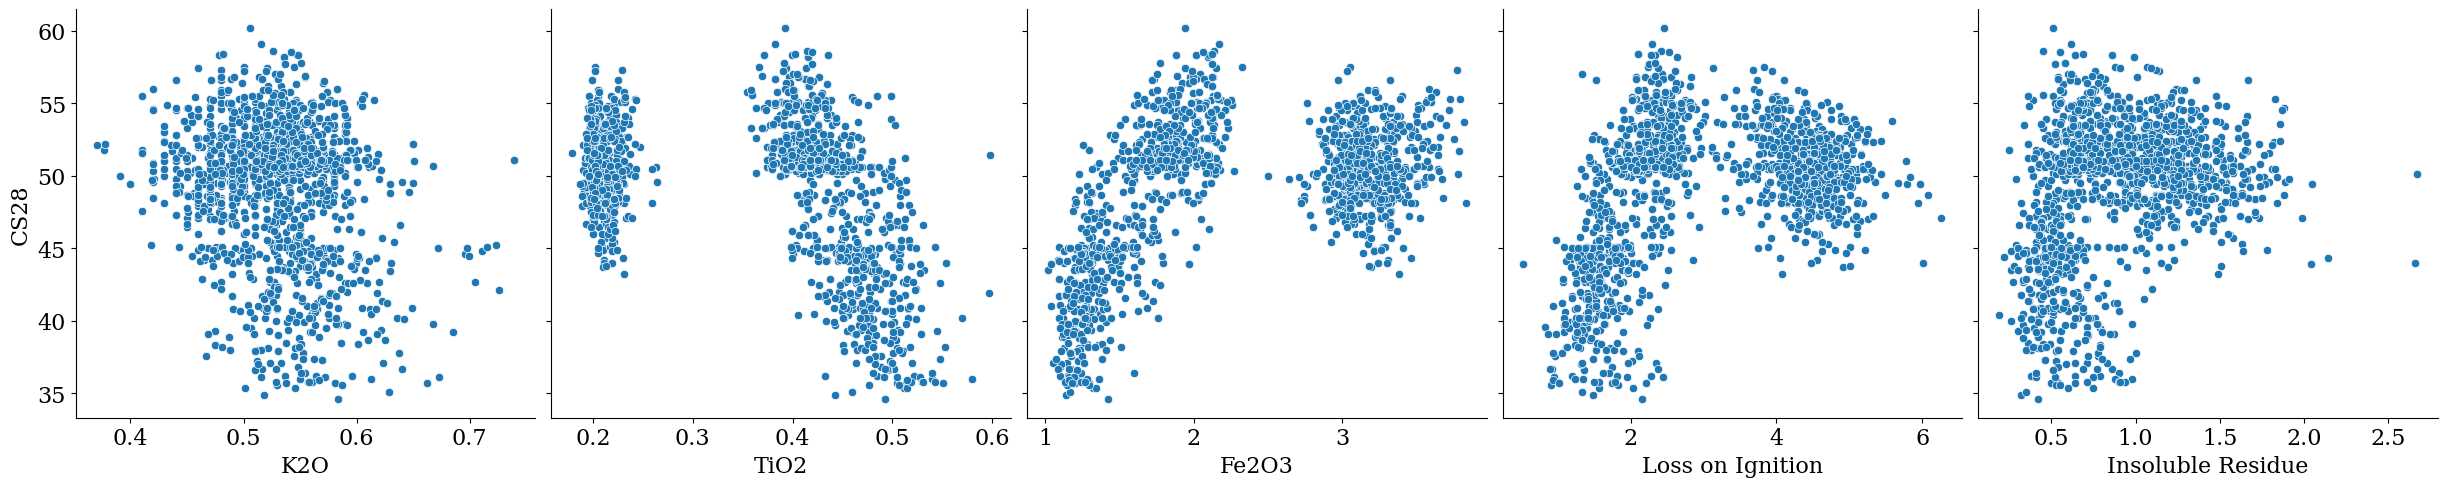

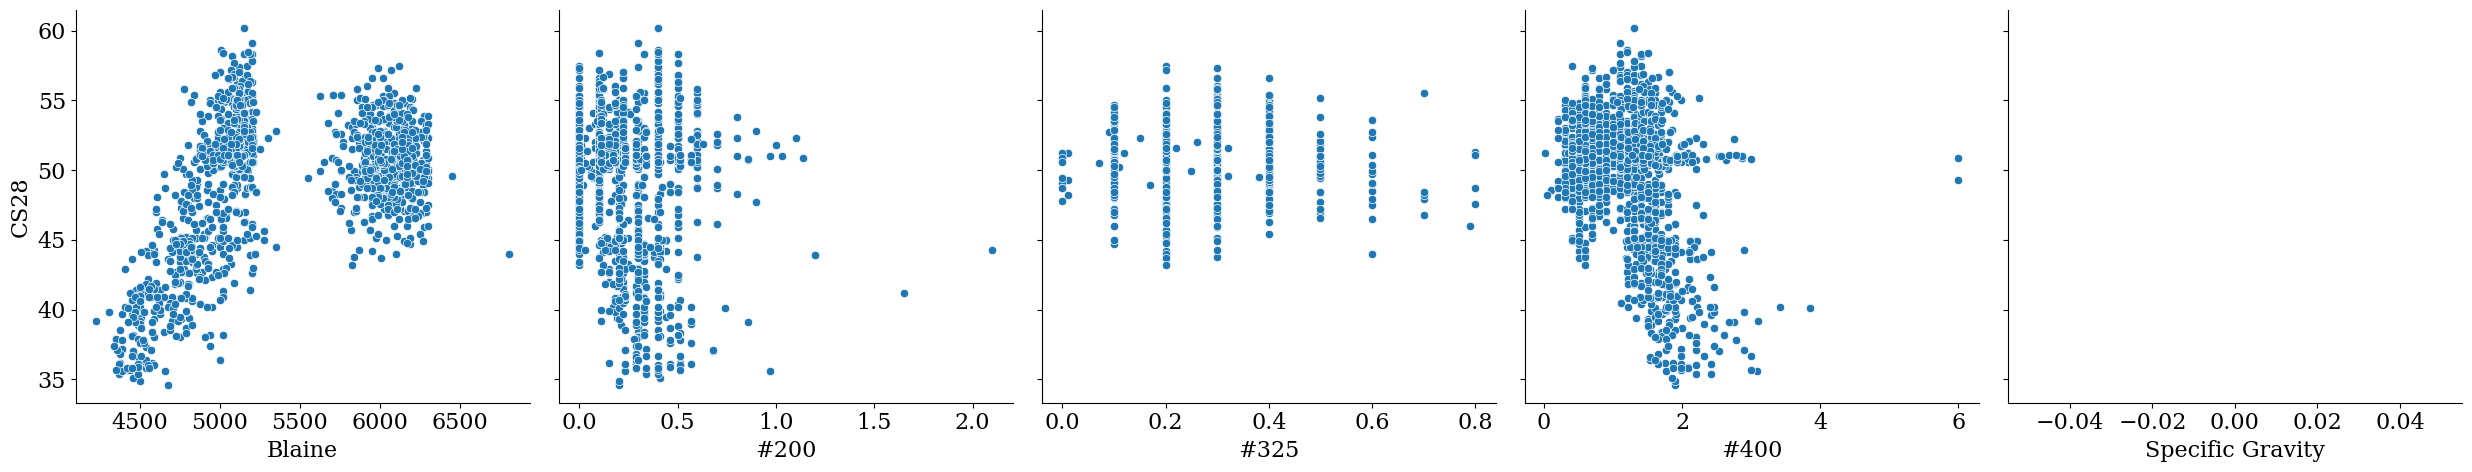

<IPython.core.display.Javascript object>

In [69]:
num_lines = 9
plots_per_line = 5

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [70]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

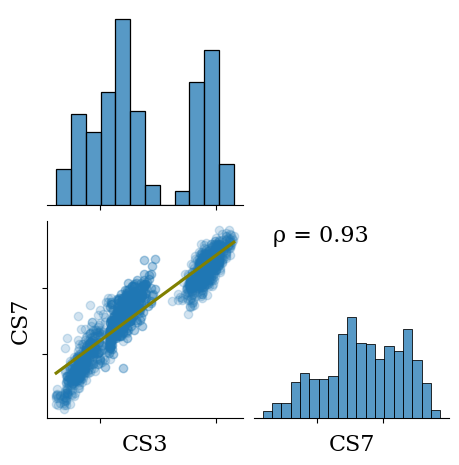

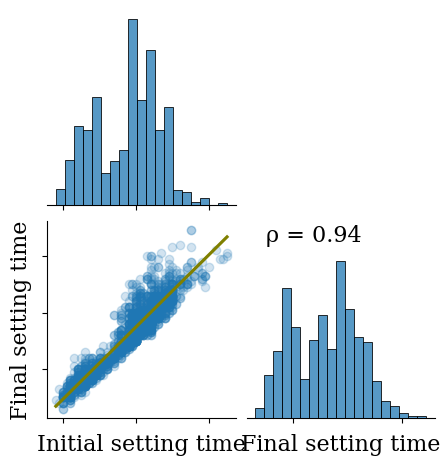

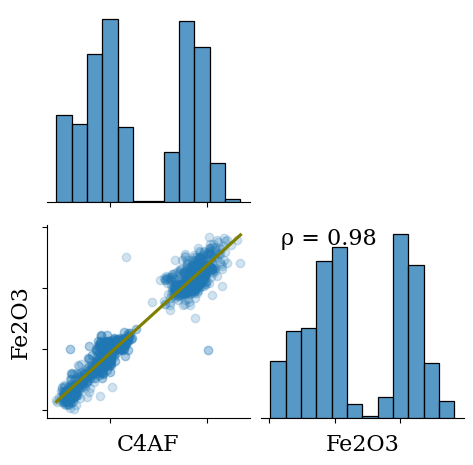

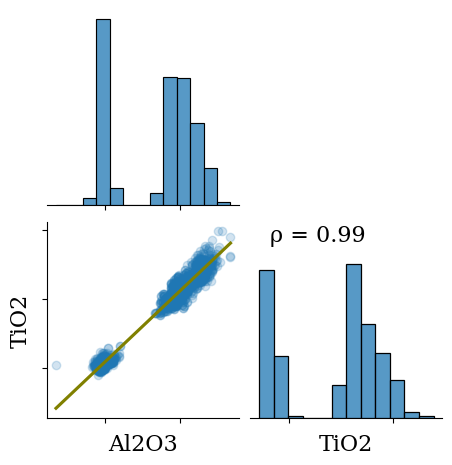

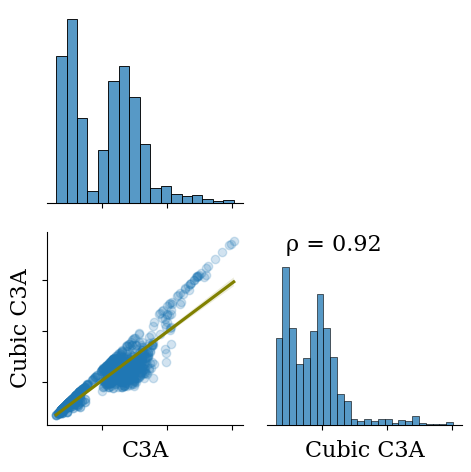

<IPython.core.display.Javascript object>

In [71]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [72]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

643 valid days out of 762


<IPython.core.display.Javascript object>

In [73]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [74]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7, 8}}

<IPython.core.display.Javascript object>

In [75]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        24
      2        24
      3        26
      4        25
      5        26
      6        25
      7        27
      8        26
      9        25
      10       25
      11       24
      12       26
2022  1        25
      2        24
      3        25
      4        25
      5        26
      6        25
      7        26
      8        27
      9        26
      10       25
      11       26
      12       25
2023  1        25
      2        23
      3        27
      4        23
      5        25
      6        13
      7        13
      8         5
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

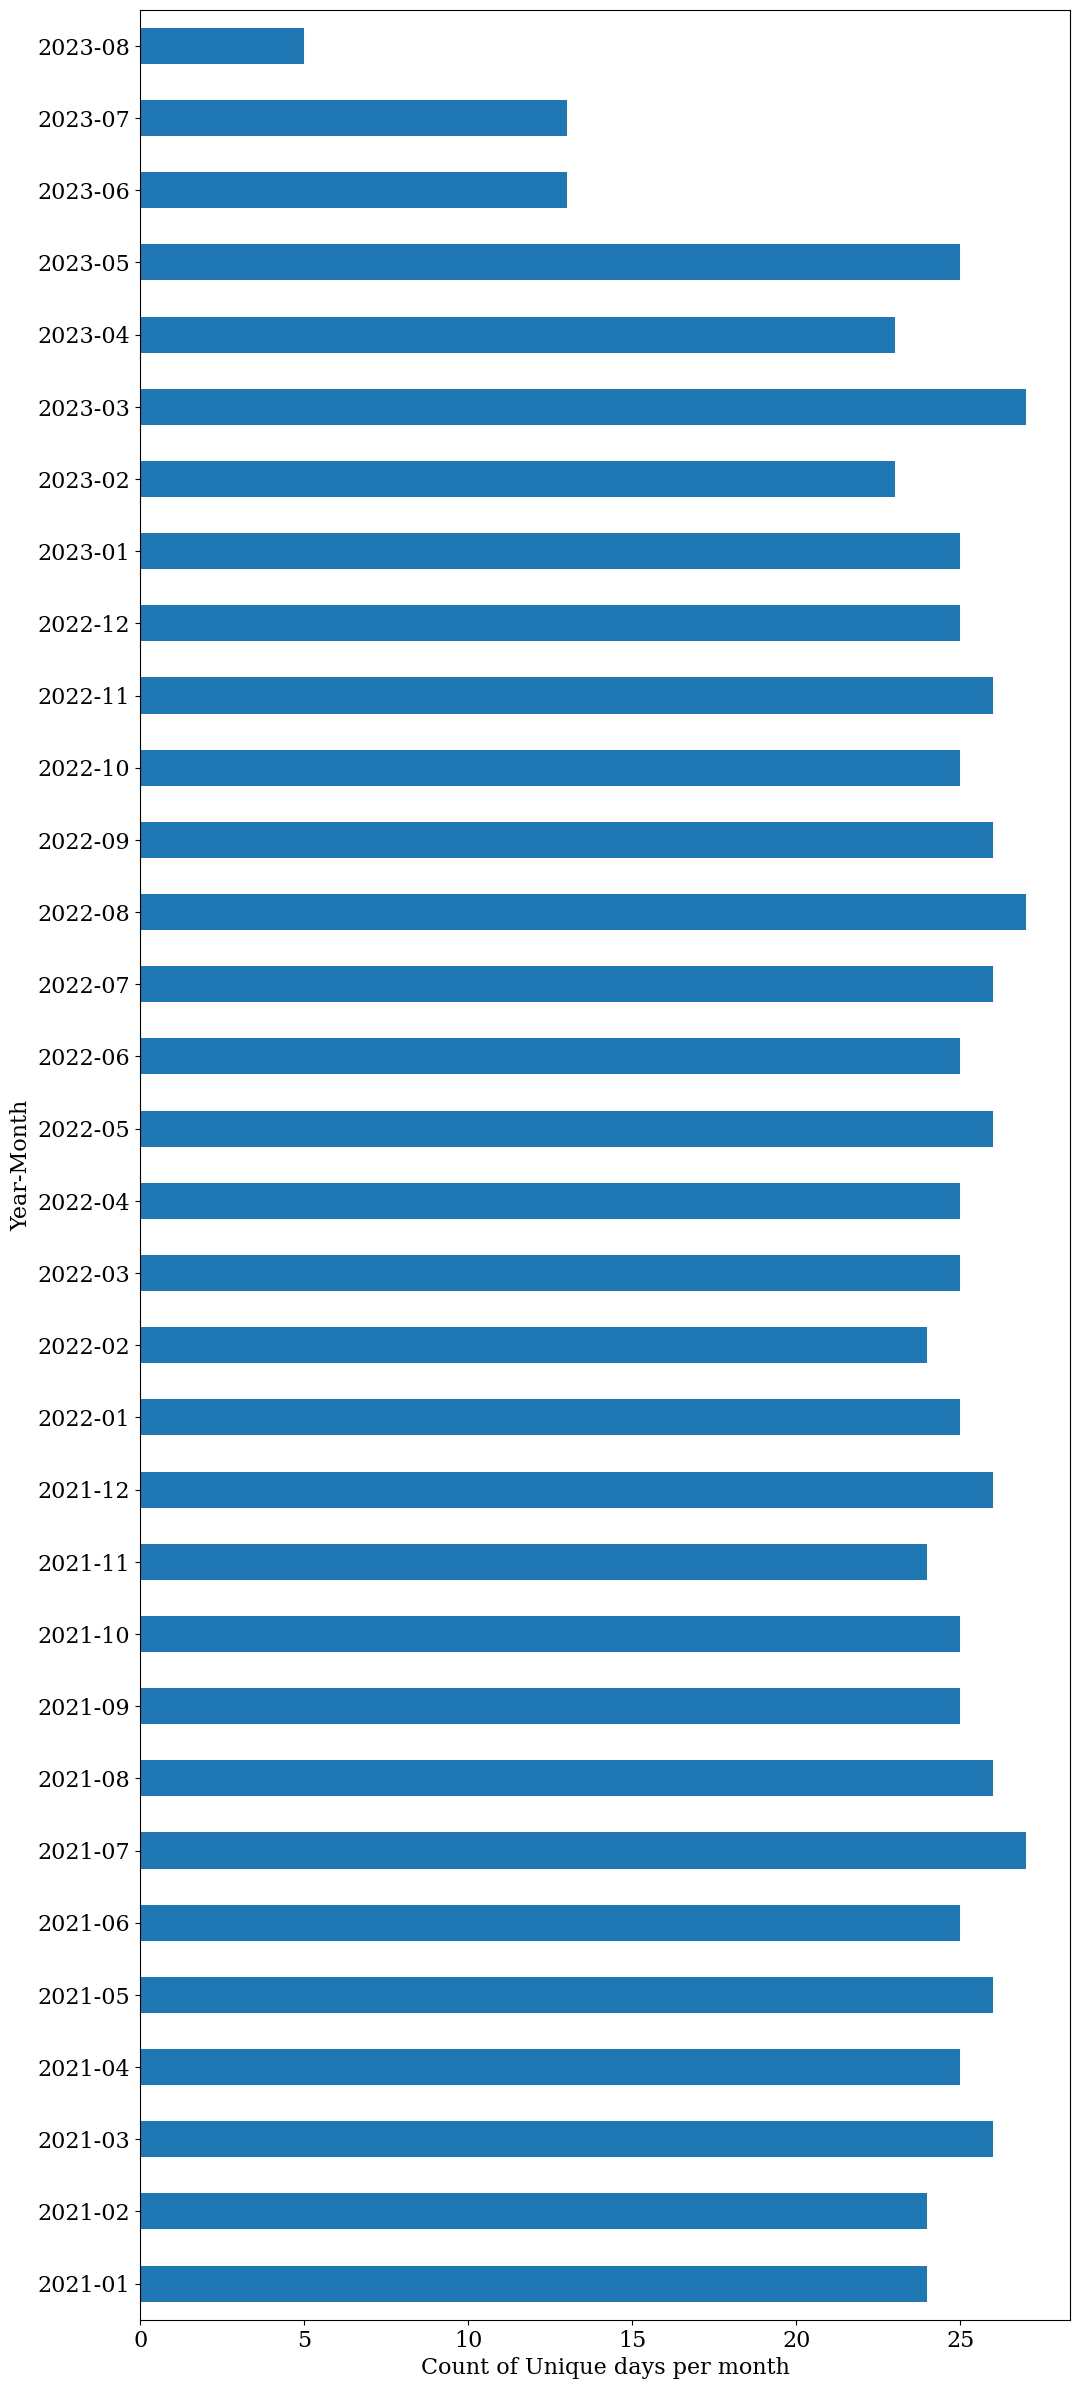

<IPython.core.display.Javascript object>

In [76]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [77]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        52
      2        53
      3        65
      4        57
      5        61
      6        60
      7        61
      8        61
      9        60
      10       59
      11       55
      12       59
2022  1        59
      2        56
      3        58
      4        59
      5        61
      6        57
      7        60
      8        65
      9        57
      10       57
      11       58
      12       61
2023  1        58
      2        52
      3        64
      4        50
      5        45
      6        26
      7        26
      8        10
Name: size, dtype: int64


<IPython.core.display.Javascript object>

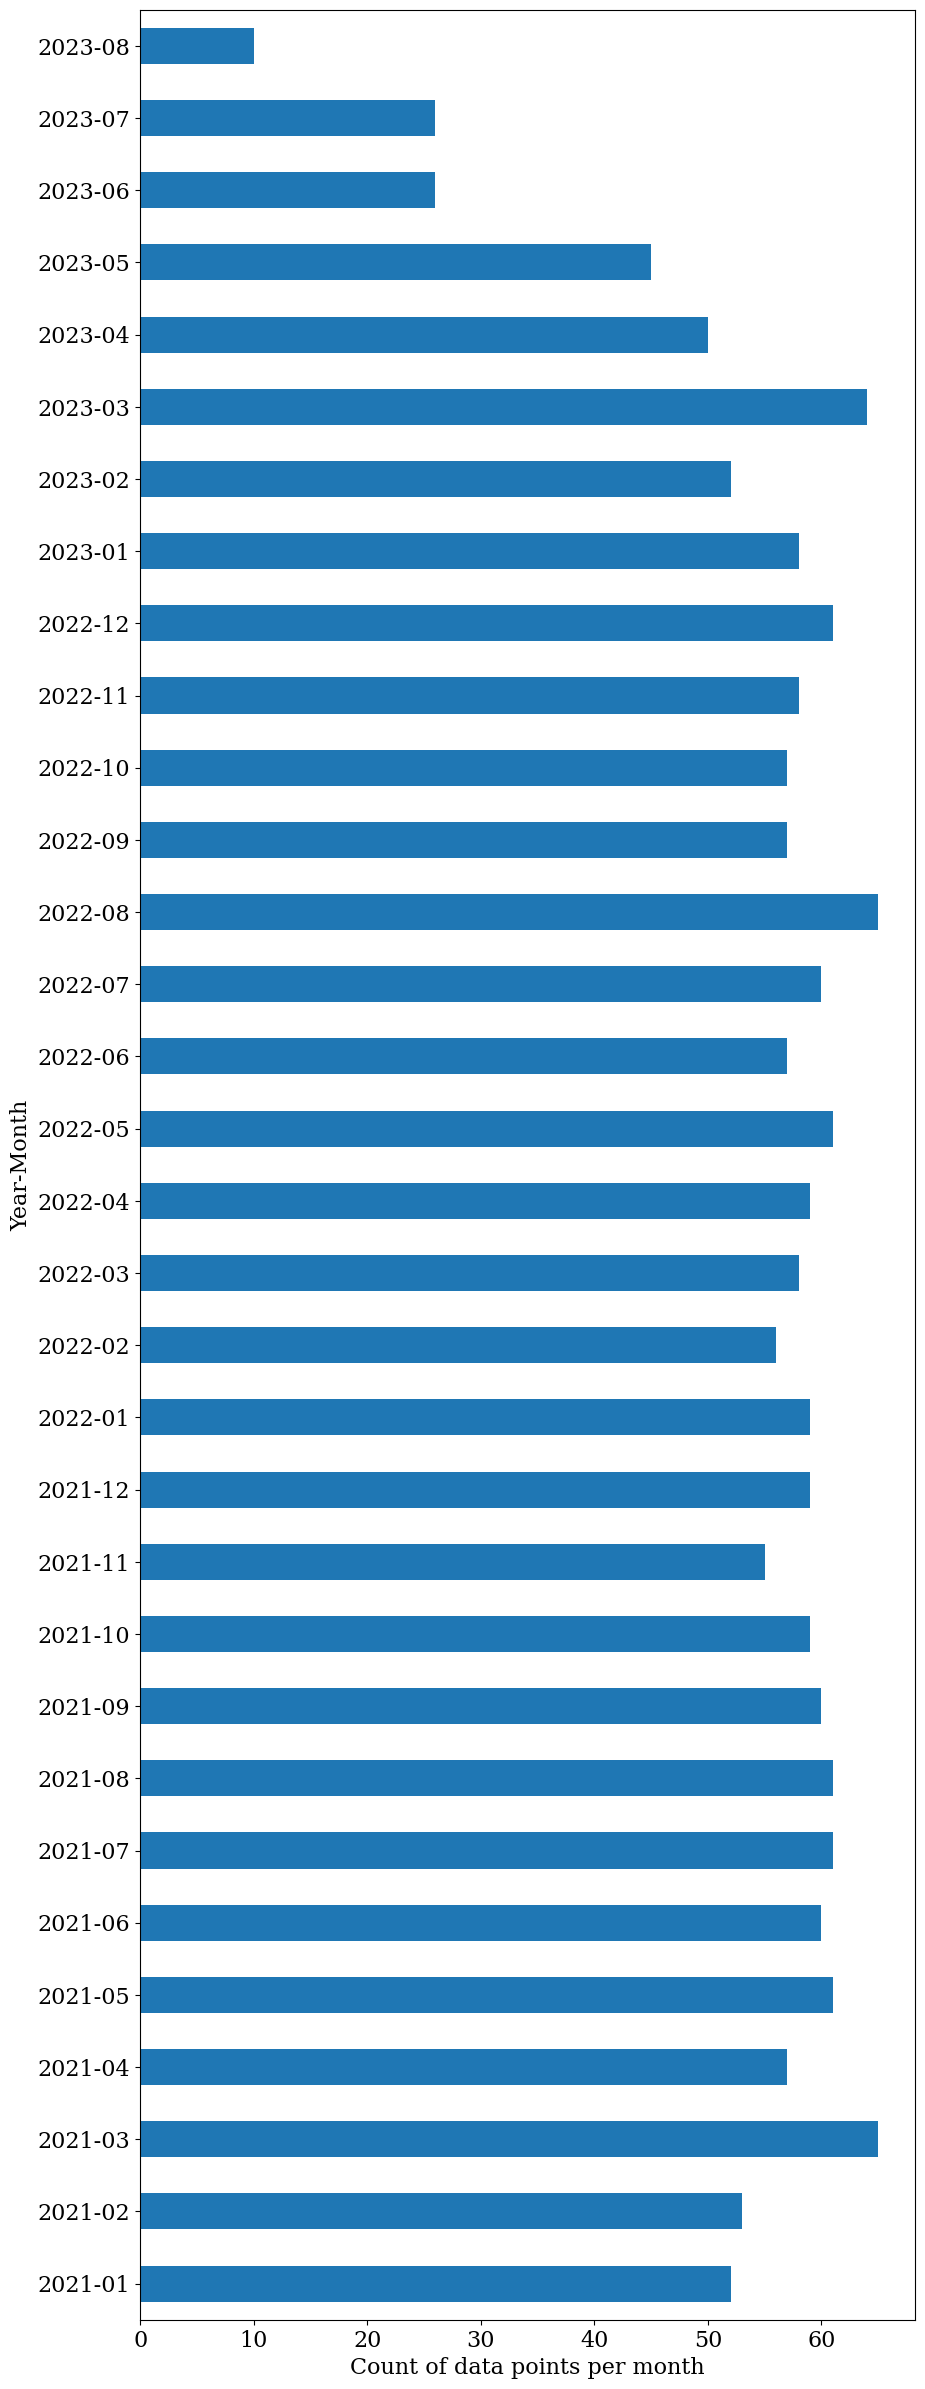

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [79]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-8 has the minimum number of days with samples - 10
2021-3 has the maximum number of days with samples - 65


<IPython.core.display.Javascript object>

In [80]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 58, 2022: 59, 2023: 41}

Mean number of observations - all years
54


<IPython.core.display.Javascript object>

In [81]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  762.000000
mean     2.286089
std      1.338617
min      1.000000
25%      1.000000
50%      2.000000
75%      4.000000
max      4.000000

<IPython.core.display.Javascript object>

In [82]:
day_counts[["DayCount"]].value_counts()

DayCount
1           370
4           234
3           120
2            38
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [83]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
2    2021      1    6         4
6    2021      1   11         4
8    2021      1   13         4
12   2021      1   18         4
18   2021      1   25         4
..    ...    ...  ...       ...
691  2023      4   12         4
695  2023      4   17         4
697  2023      4   19         4
700  2023      4   24         4
702  2023      4   26         4

[234 rows x 4 columns]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

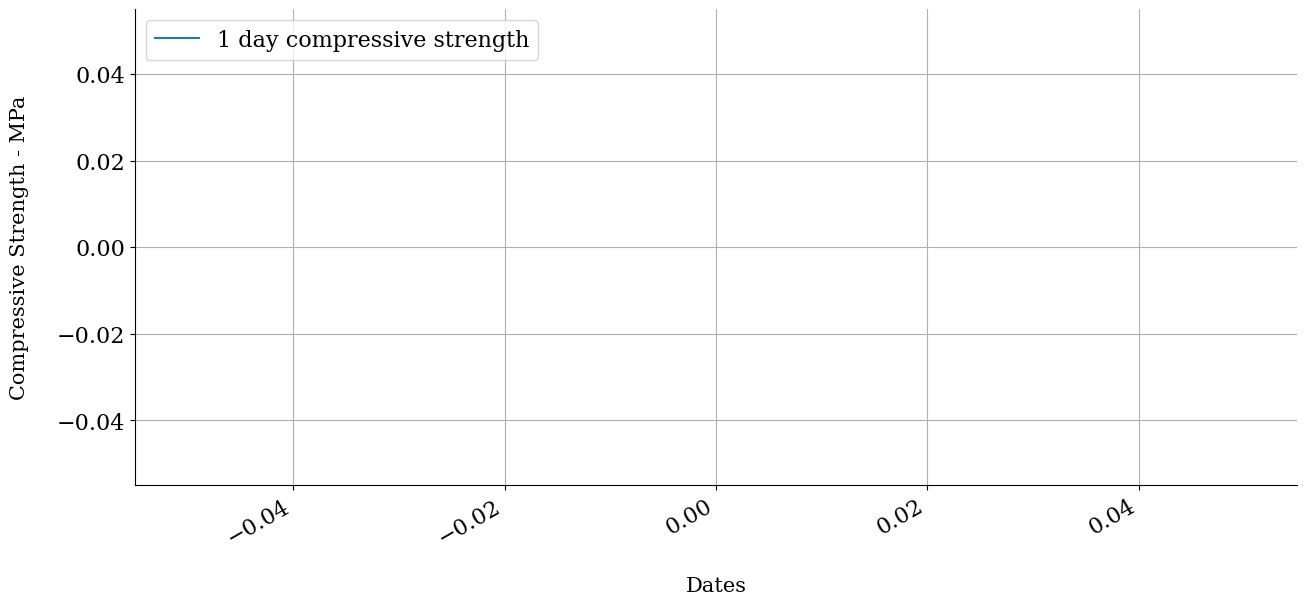

<IPython.core.display.Javascript object>

In [84]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

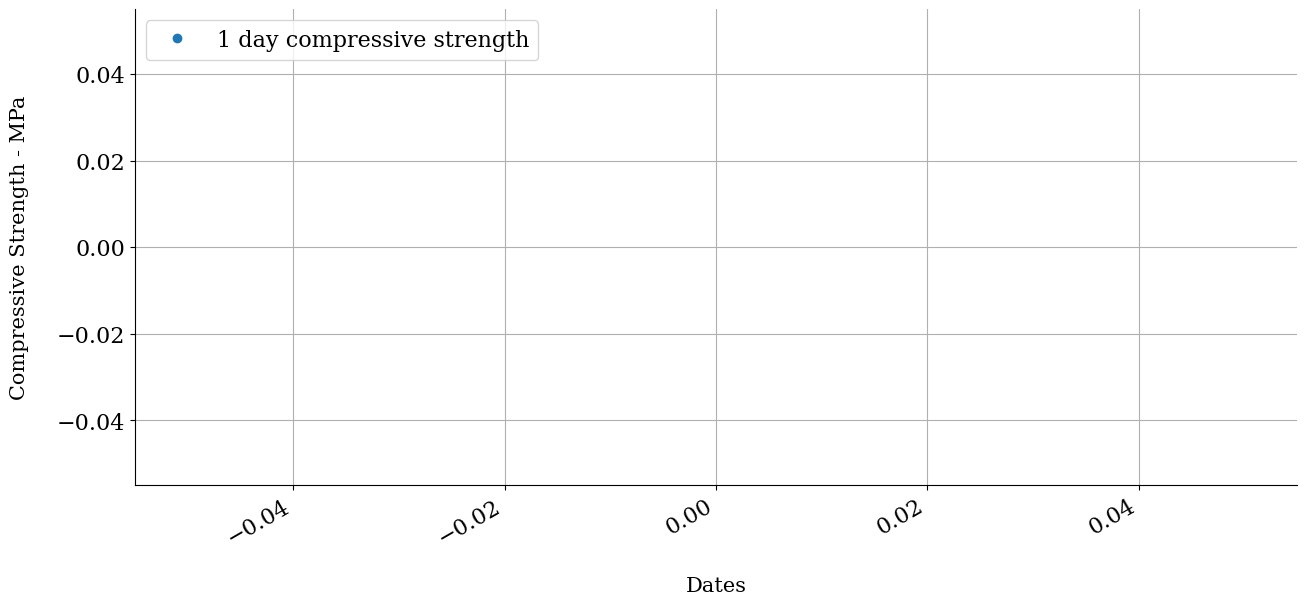

<IPython.core.display.Javascript object>

In [85]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

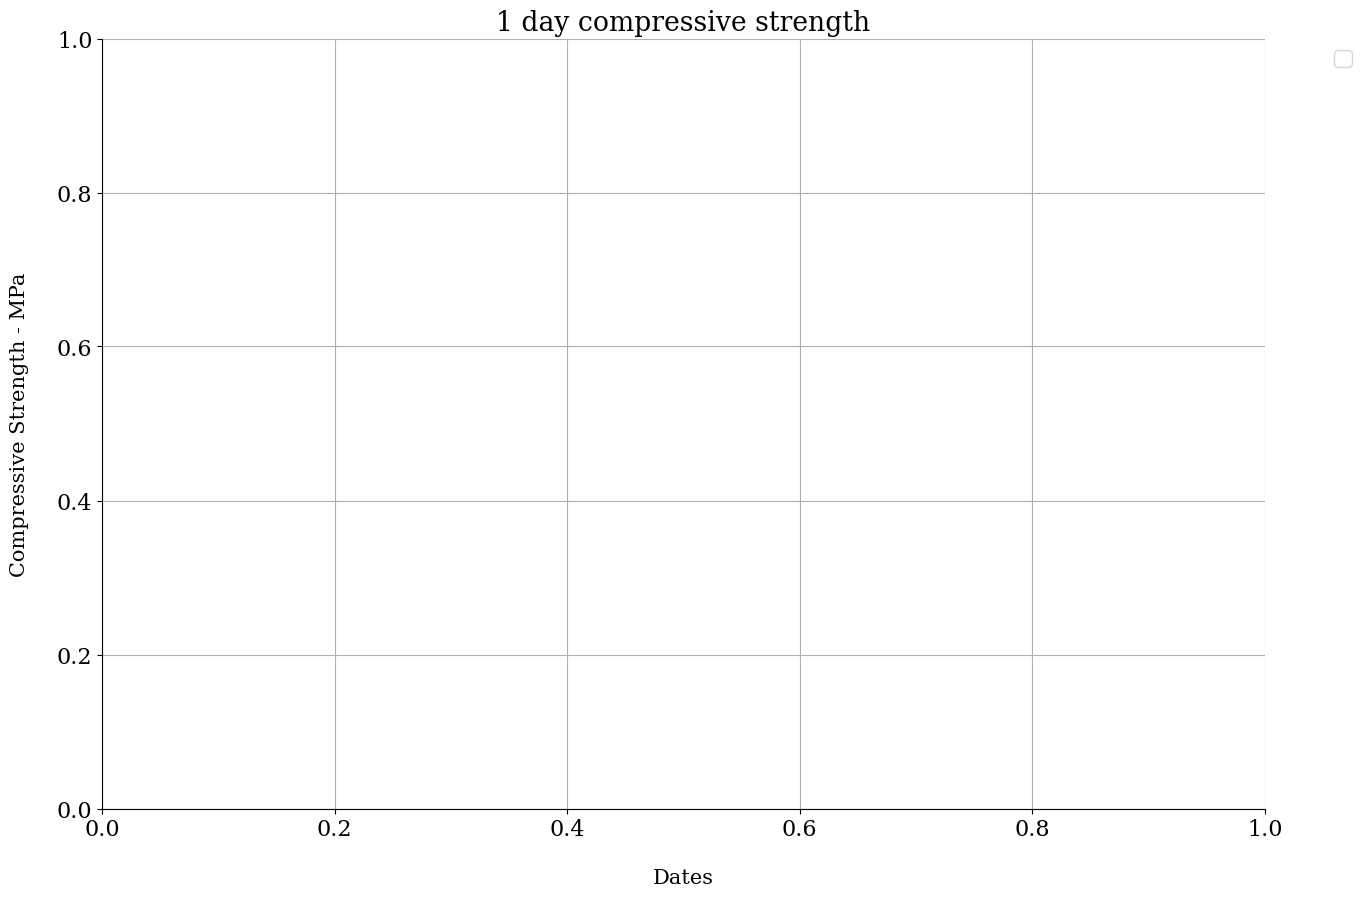

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

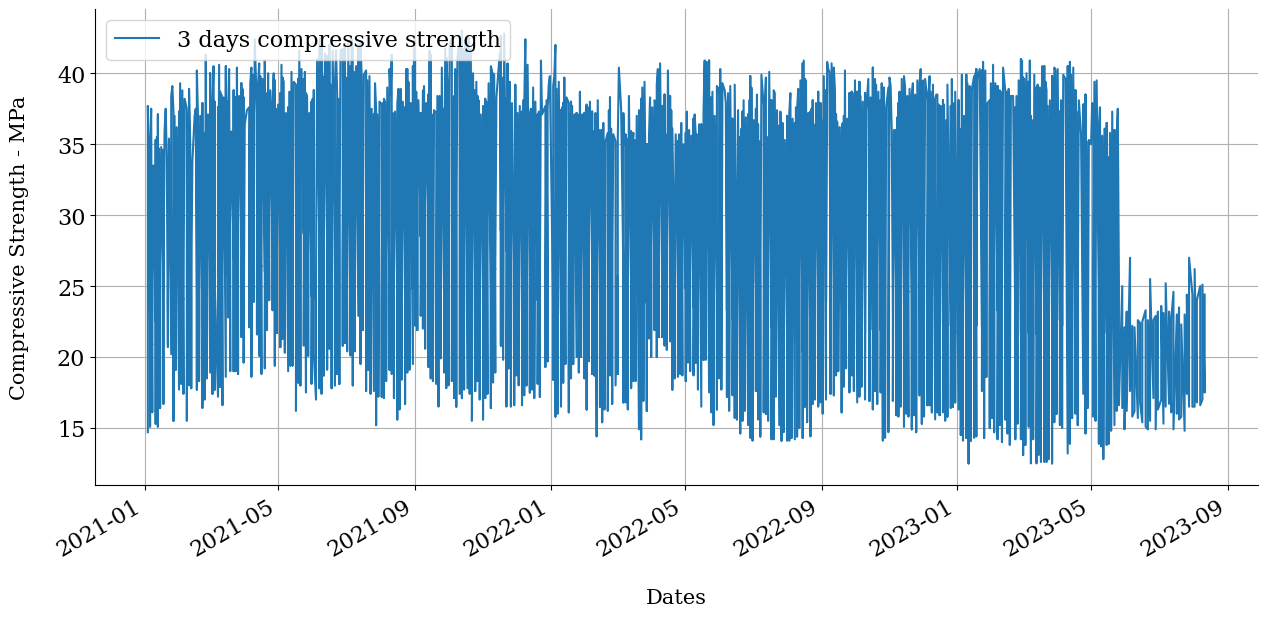

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

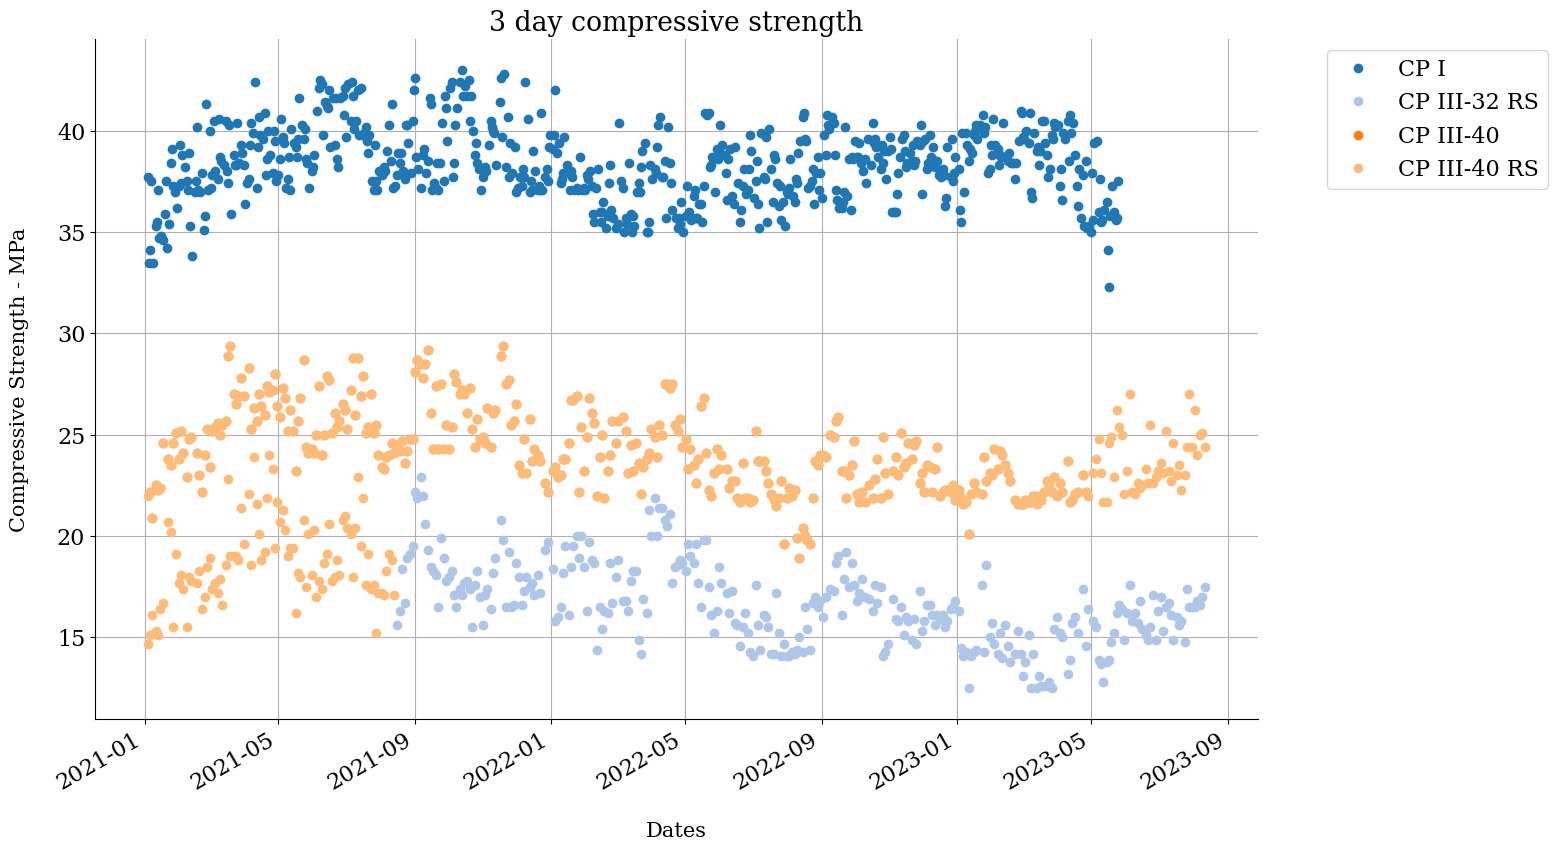

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

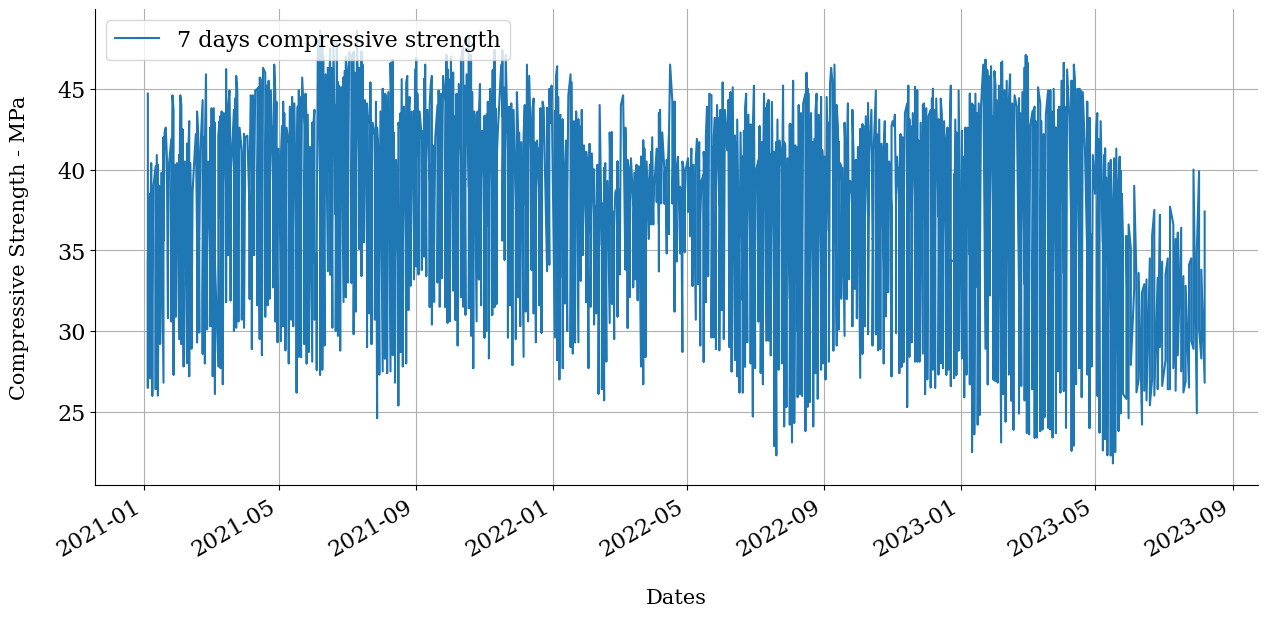

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

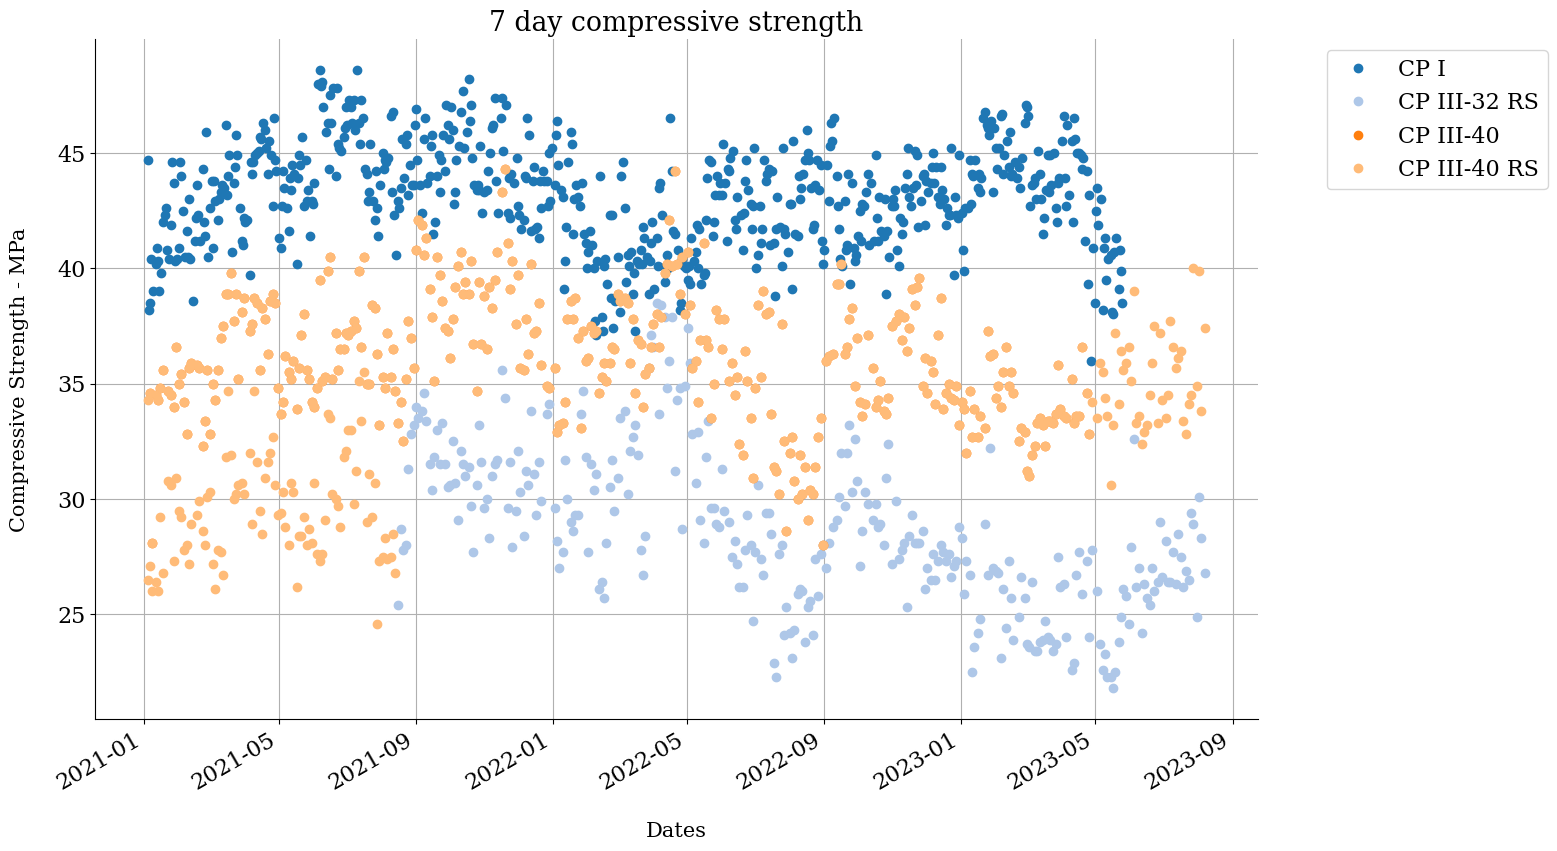

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

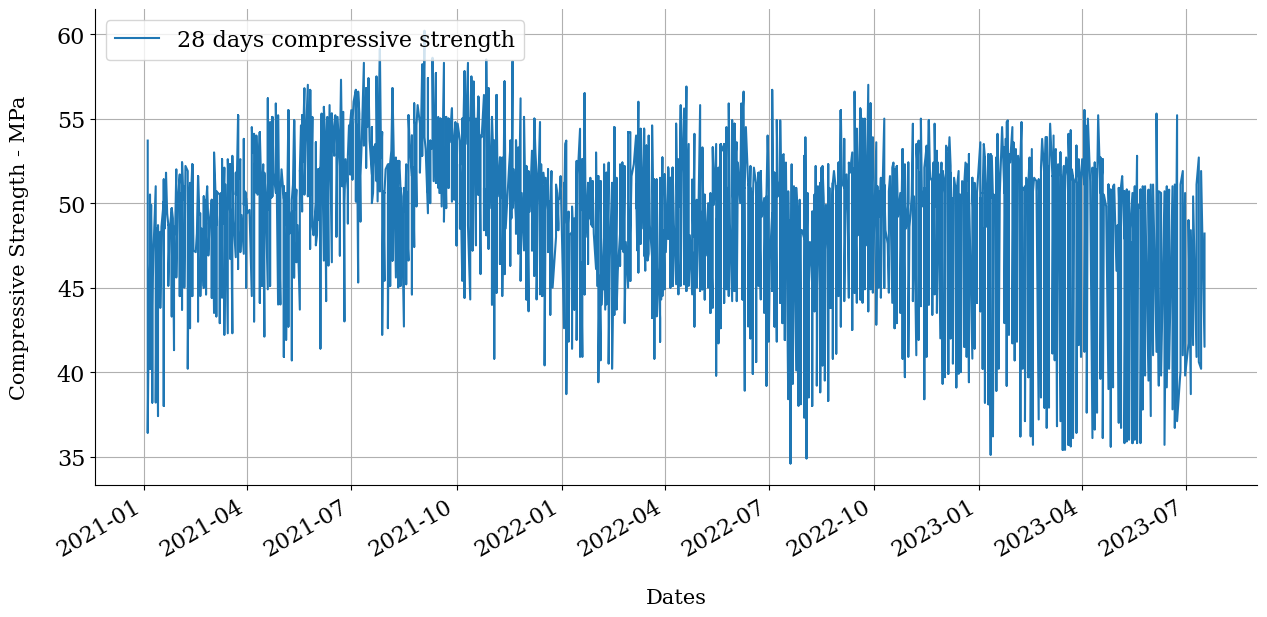

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

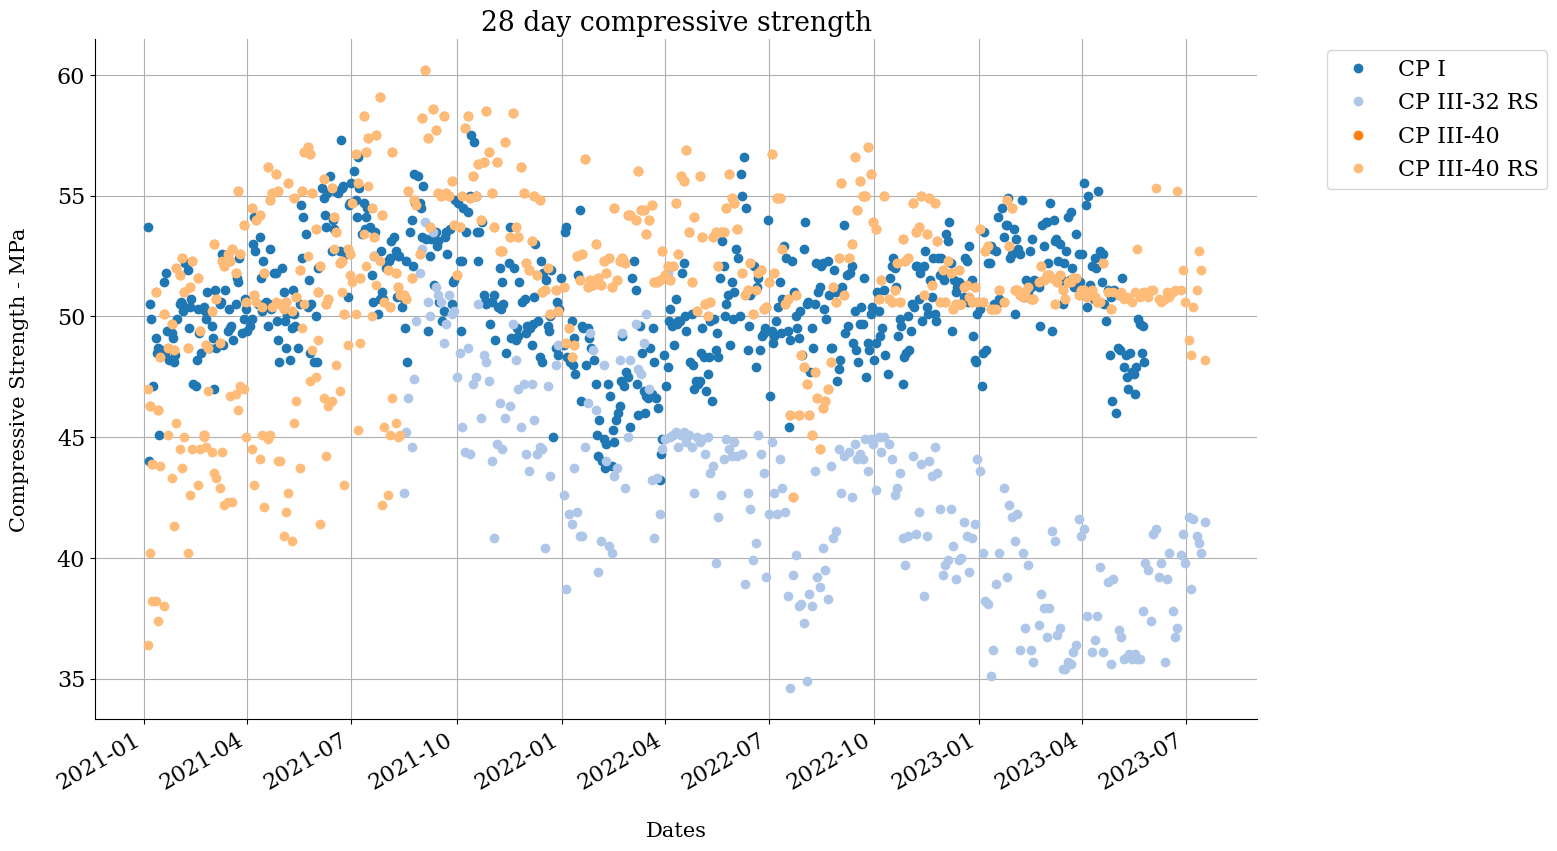

<IPython.core.display.Javascript object>

In [92]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()